# EDA: данные о авиарейсах из Анапы декабрь 2016 - февраль 2017 на основе демобазы Postgresql Авиарейсы

[Ссылка на презентацию:](#https://1drv.ms/p/s!AoYRyMwiXgCihwjas34dnqWr4J9y?e=JyMnTg)

## Импорт библиотек

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
#import plotly.plotly as py # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
from IPython.display import HTML, display
import scipy.stats as st
# Импорт геодезического модуля из библиотеки
#from geopy.distance import geodesic

## Объявление переменных

In [3]:
df = pd.read_csv(r'C:\Users\Nata\SkillFactory\dataset\U4\project_4.csv')

In [4]:
price_aviation_fuel = 32 # средняя цена на авиатопливо в декабре 2016 - феврале 2017

In [5]:
# Часовой Расход топлива для моделей самолетов
#fuel_consumption = {'733':2400, 'SU9':1700}
df_file = pd.read_csv(r'C:\Users\Nata\SkillFactory\dataset\U4\fuel_consumption.csv')

In [6]:
df_file.head()

,aircraft_code,fuel_consumption
0,SU9,1.7
1,733,2.4


In [7]:
tabledata = [['flight_id', 'int64', 'Идентификатор рейса из Анапы'],
 ['departure_airport', 'object', 'Аэропорт вылета'],
 ['arrival_airport', 'object', 'Аэропорта прилета'],
 ['aircraft_code', 'object' , 'Код модели самолета'],
 ['scheduled_departure', 'object', 'Дата вылета'],
 ['dow', 'int64', 'День недели вылета'],
 ['month_departure', 'int64', 'Месяц вылета'],
 ['day_departure', 'int64', 'День вылета'],
 ['hour_departure', 'int64', 'Час вылета'],
 ['hour_arrival', 'int64', 'Час прилета'],
 ['schedulede_range', 'int64', 'Дальность полета по расписанию'],
 ['actual_range', 'int64', 'Дальность полета реальная'],
 ['lon_departure', 'float64', 'Долгота места вылета'],
 ['lat_departure', 'float64', 'Широта места вылета'],
 ['city', 'object', 'Город прилета'],
 ['lon_arrival', 'float64', 'Долгота места вылета'],
 ['lat_arrival', 'float64', 'Широта места вылета'],
 ['flight_id_r', 'int64', 'Идентификатор обратного рейса в этот день'],
 ['tickets_total', 'int64', 'Количество проданных билетов на рейсе'],
 ['tickets_econom', 'int64', 'Количество проданных билетов в эконом-классе'],
 ['tickets_business', 'int64', 'Количество проданнх билетов билетов бизнес-класса'],
 ['tickets_total_sum', 'float64', 'Сумма проданных билетов на рейсе'],
 ['econom_sum', 'float64', 'Сумма билетов в эконом-классе'],
 ['business_sum', 'float64', 'Сумма билетов бизнес-класса'],
 ['seat_econom', 'int64', 'Число мест в эконом классе'],
 ['seat_business', 'int64', 'Число мест в бизнес классе'],
 ['model', 'object', 'Модель самолета'],
 ['range', 'int64', 'Дальность полета данной модели'],
 ['fullness_total', 'float64', 'Заполненость салона'],
 ['fullness_econom', 'float64', 'Заполненность салона эконом - класса'],
 ['fullness_business', 'float64', 'Заполненность салона бизнес - класса'],
 ['tickets_total_r', 'int64', 'Количество проданных билетов на обратном рейсе в этот день'],
 ['tickets_econom_r', 'int64', 'Количество билетов эконом — класса в этот день'],
 ['tickets_business_r', 'int64', 'Количество билетов бизнесс класса на обратном рейсе'],
 ['tickets_total_sum_r', 'float64', 'Сумма билетов на обратном рейсе'],
 ['econom_sum_r', 'float64', 'Сумма билетов эконом класса на обратном рейсе'],
 ['business_sum_r', 'float64', 'Сумма билетов бизнес класса на обратном рейсе'],
 ['fullness_total_r', 'float64', 'Заполненность салона на обратном рейсе'],
 ['fullness_econom_r', 'float64', 'Заполненость эконом класса на обратном рейсе'],
 ['fullness_business_r', 'float64', 'Заполненость бизнес класса на обратном рейсе'],
 ['fuel_consumption', 'float64', 'Расход топлива часовой: дополнительные данные'],
 ['fuel_cost', 'float64', 'Расход топлива за полет: расчетные данные']]        
 

In [8]:
categorical = ['city',
 'arrival_airport',
 'aircraft_code',
 'model',
 'dow',
 'month_departure',
 'day_departure',
 'hour_departure',
 'hour_arrival',
 'lon_arrival',             
 'lat_arrival',
 'schedulede_range',
 'actual_range',
 'breakeven',
 'seat_econom',             
 'range',
 'tickets_business_r',
 'fuel_consumption',
 'tickets_business',              
 'fuel_cost']

categorical_clear = ['dow',
 'month_departure',
 'day_departure',
 'hour_departure',
 'hour_arrival',
 'lon_arrival',             
 'lat_arrival',
 'schedulede_range',
 'actual_range',
 'breakeven',
 'seat_econom',             
 'range',
 'tickets_business_r',
 'fuel_consumption',
 'tickets_business',              
 'fuel_cost']

nominal =[
 'tickets_total',
 'tickets_econom',
 'tickets_total_sum',
 'econom_sum',
 'business_sum',
 'fullness_total',
 'fullness_econom',
 'fullness_business',
 'tickets_total_r',
 'tickets_econom_r',
 'tickets_total_sum_r',
 'econom_sum_r',
 'business_sum_r',
 'fullness_total_r',
 'fullness_econom_r',
 'fullness_business_r'
 ]

## Функции

In [9]:

def dataToTable(data, columns = None):
    '''
    Вывод информации
    
    '''
    if len(data) == 0 :  
        display(HTML('<b>Нет данных</b>'))
        return
    
    hdr = ''
    if columns != None:
        for col in columns: # Формируем заголовок таблицы
            hdr = hdr + '<th>' + col + '</th>'
            
        hdr = '<tr>' + hdr + '</tr>'

    dt = ''
    for row in data: # Проходим циклом по всем строкам
        dt = dt + '<tr>'
        for cell in row: # И формируем тело таблицы
            dt = dt + '<td>' + str(cell) + '</td>'
        dt = dt + '</tr>'
            
    display(HTML('<table>' + hdr + dt + '</table>')) # Выводим таблицу на экран



In [10]:
def plot_map():
    scl = ['rgb(213,62,79)', 'rgb(244,109,67)', 'rgb(253,174,97)', \
    'rgb(254,224,139)', 'rgb(255,255,191)', 'rgb(230,245,152)', \
    'rgb(171,221,164)', 'rgb(102,194,165)', 'rgb(50,136,189)'
    ]
    n_colors = len(scl)

    fig = go.Figure()

    lons = []
    lats = []
    lons = np.empty(3 * (len(df['lon_arrival'].value_counts().index.to_list())))
    lons[::3] = df['lon_departure'].value_counts().index.to_list()
    lons[1::3] = df['lon_arrival'].value_counts().index.to_list()
    lons[2::3] = None
    lats = np.empty(3 * (len(df['lat_arrival'].value_counts().index.to_list())))
    lats[::3] = df['lat_departure'].value_counts().index.to_list()
    lats[1::3] = df['lat_arrival'].value_counts().index.to_list()
    lats[2::3] = None

    for i in range( len(df['lon_arrival'].value_counts().index.to_list()) ):
        fig.add_trace(go.Scattergeo(
            lon = lons,
            lat = lats,
            mode = 'lines',
            line = dict(width = 2, color = scl[i % n_colors])
            ))

    fig.update_layout(
        title_text = 'Рис 1. Схемы рейсов из Анапы в Москву и Белгород<br>(Click and drag to rotate)',
        showlegend = False,
        geo = dict(
            showland = True,
            showcountries = True,
            showocean = True,
            countrywidth = 0.5,
            landcolor = 'rgb(230, 145, 56)',
            lakecolor = 'rgb(0, 255, 255)',
            oceancolor = 'rgb(0, 255, 255)',
            projection = dict(
                type = 'orthographic',
                rotation = dict(
                    lon = -100,
                    lat = 40,
                    roll = 0
                )
            ),
            lonaxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)',
                gridwidth = 0.5
            ),
            lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)',
                gridwidth = 0.5
            )
        )
    )

    fig.show()

In [11]:
def add_info(df, df_file, _key):
    '''
    add any information from csv into dataframe
    '''        
    for j in range(1,df_file.shape[1]):
        _dict = df_file.set_index(df_file.columns[0]).to_dict()[df_file.columns[j]]
        print(_dict)
        # new column name
        new_column = df_file.columns[j].lower()
        # create new column
        df[new_column] = df[_key].map(_dict)

In [12]:
def show_correlation(df, features):
    '''
    plot correlation matrix
    '''
    
    #corr_matrix = df.drop(categorial_feature, axis=1).corr()
    corr_matrix = df[features].corr()
    plt.rcParams['figure.figsize'] = (15,15)
    sns.heatmap(corr_matrix, square=True,
                annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
    plt.tight_layout()
    
def get_boxplot(df, column, _target):
    '''
    plot boxes for the column
    '''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=_target,data=df, ax=ax) 
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(df: pd.DataFrame, column: object, _target='score') -> bool:
    '''
    Функция для проведения теста Стьюдента для номинативных и смешанных переменных
    '''
    cols = df.loc[:, column].value_counts()
    cols = cols[cols>15].index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], _target].dropna(), 
                        df.loc[df.loc[:, column] == comb[1], _target].dropna()).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони #0.075
            print('Найдены статистически значимые различия для колонки', column)
            return True
            break

def normalize(data, column, _key):
    '''
    normalisation of grouped data
    '''
    
    mean_grp = data.groupby(_key)[column].mean()
    data['mean_'+column+'_grp'] = data[_key].apply(lambda x: mean_grp[x])
    max_grp = data.groupby(_key)[column].max()
    data['max_'+column+'_grp'] = data[_key].apply(lambda x: max_grp[x])
    data[column+'_norm'] = (data[column] - data['mean_'+column+'_grp']) / data['max_'+column+'_grp']
    data.drop(['mean_'+column+'_grp', 'max_'+column+'_grp'], axis = 1, inplace=True)

    
def min_max_normalise(df, col):
    '''
    normalisation only column
    '''
    min_age = df[col].min()
    max_age = df[col].max()
    df[col+'_norm'] = df[col].apply(lambda x: round((x-min_age)/(max_age-min_age),2))                

In [13]:
def IQR_outlier(df: pd.DataFrame, column: object, verbose: bool=True) -> tuple:
    '''
    Функция для отображения границ межквартильного размаха
    '''
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    IQR = perc75 - perc25
    low = perc25 - 1.5*IQR
    high = perc75 + 1.5*IQR
    if verbose:
        print('25-й перцентиль: {},'.format(perc25)[:-1], '75-й перцентиль: {},'.format(perc75),
            "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=low, l=high))
    return (low, high)


## Описание данных

In [14]:
dataToTable(tabledata, columns=["Поле","Тип", "Описание"])

Поле,Тип,Описание
flight_id,int64,Идентификатор рейса из Анапы
departure_airport,object,Аэропорт вылета
arrival_airport,object,Аэропорта прилета
aircraft_code,object,Код модели самолета
scheduled_departure,object,Дата вылета
dow,int64,День недели вылета
month_departure,int64,Месяц вылета
day_departure,int64,День вылета
hour_departure,int64,Час вылета
hour_arrival,int64,Час прилета


## Первичный осмотр данных

In [15]:
df.sample(5)

,flight_id,departure_airport,arrival_airport,aircraft_code,scheduled_departure,dow,month_departure,day_departure,hour_departure,hour_arrival,...,fullness_business,tickets_total_r,tickets_econom_r,tickets_business_r,tickets_total_sum_r,econom_sum_r,business_sum_r,fullness_total_r,fullness_econom_r,fullness_business_r
12,136805,AAQ,EGO,SU9,2016-12-07,3,12,7,9,10,...,91.0,93,81,12,740.1,513.3,226.8,95.0,95.0,100.0
51,136390,AAQ,SVO,733,2016-12-26,1,12,26,10,11,...,100.0,124,113,11,1788.4,1385.8,402.6,95.0,95.0,91.0
163,136403,AAQ,SVO,733,2017-02-20,1,2,20,10,11,...,100.0,106,96,10,1540.8,1174.8,366.0,81.0,81.0,83.0
23,136141,AAQ,SVO,733,2016-12-12,1,12,12,10,11,...,91.0,119,109,10,1703.0,1337.0,366.0,91.0,92.0,83.0
15,136768,AAQ,EGO,SU9,2016-12-08,4,12,8,9,10,...,100.0,92,81,11,721.2,513.3,207.9,94.0,95.0,91.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            180 non-null    int64  
 1   departure_airport    180 non-null    object 
 2   arrival_airport      180 non-null    object 
 3   aircraft_code        180 non-null    object 
 4   scheduled_departure  180 non-null    object 
 5   dow                  180 non-null    int64  
 6   month_departure      180 non-null    int64  
 7   day_departure        180 non-null    int64  
 8   hour_departure       180 non-null    int64  
 9   hour_arrival         180 non-null    int64  
 10  schedulede_range     180 non-null    int64  
 11  actual_range         180 non-null    int64  
 12  lon_departure        180 non-null    float64
 13  lat_departure        180 non-null    float64
 14  city                 180 non-null    object 
 15  lon_arrival          180 non-null    flo

Данный датасет содержит 180 записей об авиарейсах, выполненных из Анапы за 3 месяца зимнего периода 2016 - 2017 года
Месяц и день прилета, также как и года исключены из датасета, поскольку привязка прямых и обратных рейсов осуществлена по дате.
Вообще данные только об Анапе и 2 городах прилета, что хорошо видно на карте:

In [17]:
#Проверим датасет на наличие дубликатов:
if len(df)>len(df.drop_duplicates()):
    print('Дубликаты есть')
    display(df[df.duplicated()])
else:
    print('Дубликатов нет')


Дубликатов нет


In [18]:
#посмотрим на уникальные значения столбцов и их тип и область допустимых значений из описания датасета
for col in df.columns:
    print('{} ({}) - {}'.format(col,df[col].dtype,df[col].unique(),))

flight_id (int64) - [136698 136187 136474 136774 136391 136873 136306 136843 136943 136324
 136450 136793 136805 136418 136491 136768 136273 136800 136913 136352
 136447 136865 136911 136141 136223 136691 136872 136143 136465 136688
 136385 136886 136318 136771 136257 136742 136725 136338 136738 136252
 136210 136961 136631 136244 136492 136702 136653 136253 136397 136592
 136680 136390 136617 136207 136866 136262 136296 136785 136327 136801
 136368 136929 136661 136420 136458 136936 136937 136119 136819 136159
 136645 136202 136706 136209 136632 136164 136609 136122 136464 136733
 136586 136423 136366 136855 136316 136758 136871 136275 136781 136185
 136709 136172 136907 136282 136669 136471 136649 136389 136387 136654
 136463 136887 136428 136755 136310 136927 136293 136767 136345 136838
 136383 136571 136720 136436 136485 136757 136131 136678 136178 136729
 136642 136226 136869 136181 136900 136135 136486 136951 136672 136441
 136956 136411 136360 136823 136754 136322 136841 136284 

Колонки 'departure_airport', 'seat_business','lat_departure', 'lon_departure' имеют единственное значение,
поэтому для моделирования будут непригодны

In [19]:
#drop_columns = ['departure_airport', 'seat_business', 'lat_departure', 'lon_departure']

In [20]:
plot_map();

В даттасете не хватает данных о затратах на топливо в полете, для этого будут заведено номинальное значение fuel_cost.
Существующие данные можно разбить на категориальные и номинальные в соответствии с таблицей:

In [21]:
dataToTable(np.reshape(categorical,(5,4)), columns=["Категориальные данные"])

In [22]:
dataToTable(np.reshape(nominal,(4,4)), columns=["Номинальные данные"])

## Дополнительные данные

Рассчитать стоимость топлива, расходуемого самолетом при перелете из одного аэропорта в другой можно двумя способами:
    1. Умножить расстояние на расход топлива/км
    2. Умножить дальность полета в часах на часовой расход топлива
Первый вариант более затратный по времени расчета: на Рис 1. хорошо видно, что необходимо строить точный коридор полета воздушного судна, а затем рассчитывать расстояние этой траектории
Поэтому остановимся на втором: дальность полета как расчетная, так и реальная в датасете уже присутствует.
Остается добавить часовой расход топлива, определеный в файле fuel_consumption.csv:

In [23]:
add_info(df, df_file, 'aircraft_code');

{'SU9': 1.7, '733': 2.4}


In [24]:
df.head()

,flight_id,departure_airport,arrival_airport,aircraft_code,scheduled_departure,dow,month_departure,day_departure,hour_departure,hour_arrival,...,tickets_total_r,tickets_econom_r,tickets_business_r,tickets_total_sum_r,econom_sum_r,business_sum_r,fullness_total_r,fullness_econom_r,fullness_business_r,fuel_consumption
0,136698,AAQ,EGO,SU9,2016-12-01,4,12,1,9,10,...,93,81,12,740.1,513.3,226.8,95.0,95.0,100.0,1.7
1,136187,AAQ,SVO,733,2016-12-01,4,12,1,10,11,...,111,100,11,1628.6,1226.0,402.6,85.0,84.0,91.0,2.4
2,136474,AAQ,SVO,733,2016-12-02,5,12,2,10,11,...,116,105,11,1690.8,1288.2,402.6,89.0,88.0,91.0,2.4
3,136774,AAQ,EGO,SU9,2016-12-02,5,12,2,9,10,...,95,83,12,752.7,525.9,226.8,97.0,97.0,100.0,1.7
4,136391,AAQ,SVO,733,2016-12-03,6,12,3,10,11,...,109,97,12,1628.6,1189.4,439.2,83.0,82.0,100.0,2.4


In [25]:
#стоимость топлива в тыс.руб
df['fuel_cost'] = round(price_aviation_fuel * df['fuel_consumption'] * df['schedulede_range'] / 60,2) # Расчет суммы расхода таоплива за полет

In [26]:
#разница в тыс. руб между стоимость проданных билетов и стоимостью топлива на данном рейсе
df['profitability'] = round((df['tickets_total_sum'] - df['fuel_cost']),2) 

In [27]:
df[['profitability', 'tickets_total_sum', 'fuel_cost' ]].head()

,profitability,tickets_total_sum,fuel_cost
0,701.07,746.4,45.33
1,1745.80,1873.8,128.00
2,1758.00,1886.0,128.00
3,694.77,740.1,45.33
4,1428.60,1556.6,128.00


<AxesSubplot:title={'center':'Log Normal'}, xlabel='profitability'>

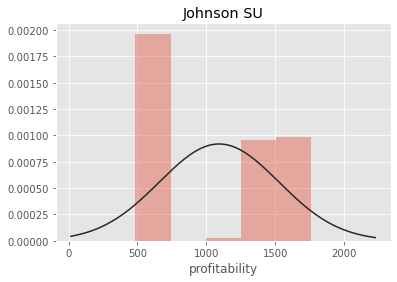

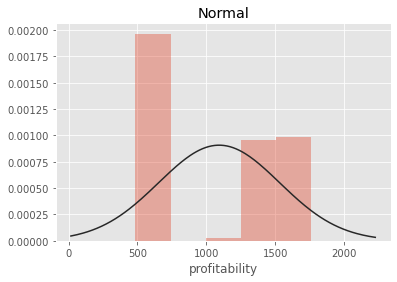

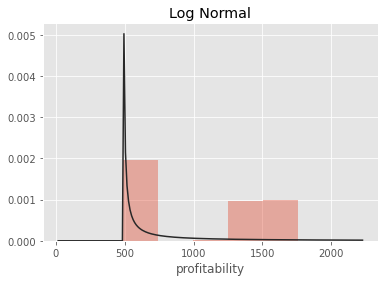

In [28]:
y = df['profitability']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [29]:
normalize(df, 'profitability', 'arrival_airport')

<AxesSubplot:title={'center':'Log Normal'}, xlabel='profitability_norm'>

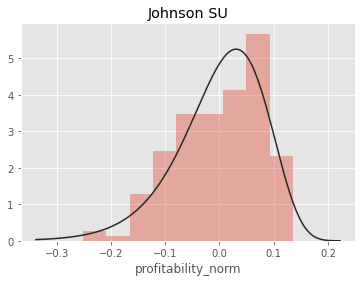

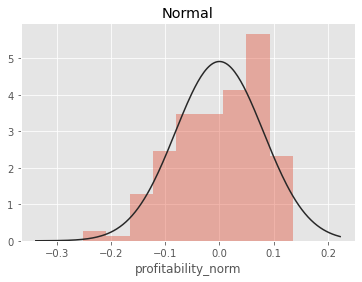

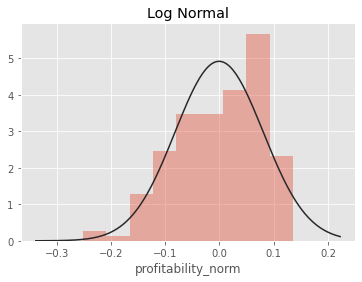

In [30]:
y = df['profitability_norm']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

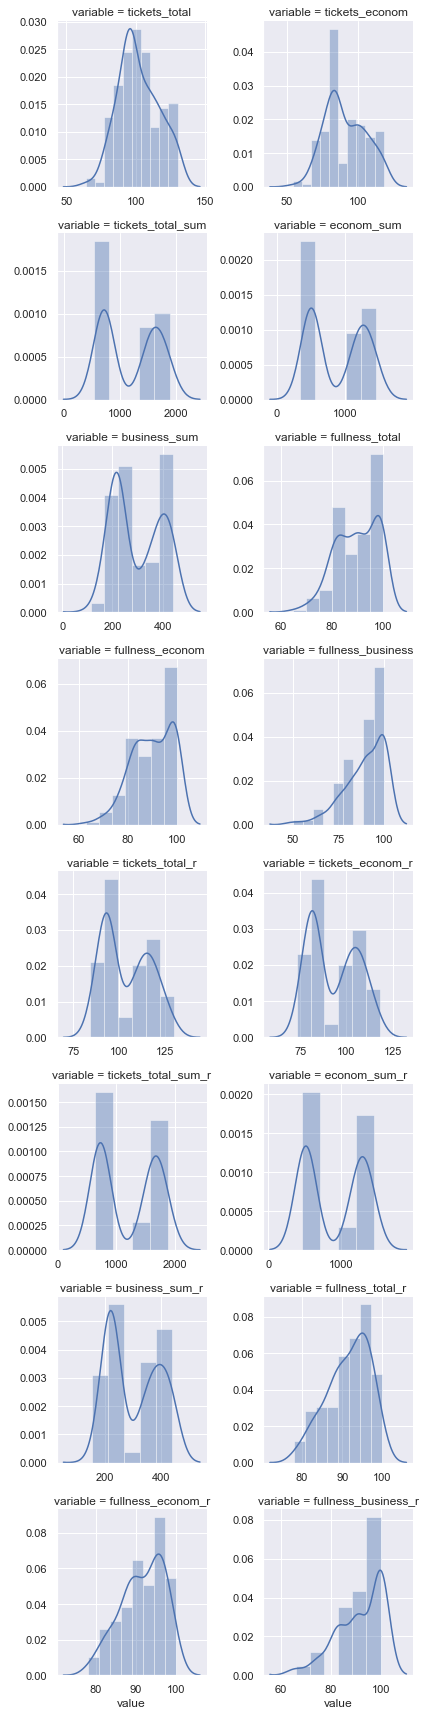

In [61]:

f = pd.melt(df, value_vars=nominal)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Рассматривая графики распределения номинальных признаков можно сделать следующие выводы:
    
1. Общее количество покупаемых билетов (tickets_total) на рейсах близко к нормальному с симметрией в точке 100
    
2. tickets_total_sum, econom_sum, business_sum четко выделяются 2 максимума: разделяются группы рейсов по городам прилета.
    
3. Наполняемость салона fulless_total, как и эконом класса варьируется от 80 до 100%, но иногда падает до 65%,
    а вот наполняемость салона бизнес класса варьируется от 50 до 100%, при этом 100% - точка максимума
    
4. Сумма продаж билетов бизнес класса на прямых и обратных рейсах имеет 2 выраженных максимума в точках  200 и 400 тыс рублей, для общей суммы проданных билетов эти точки равныы 750 и 1600 соответственно   
    

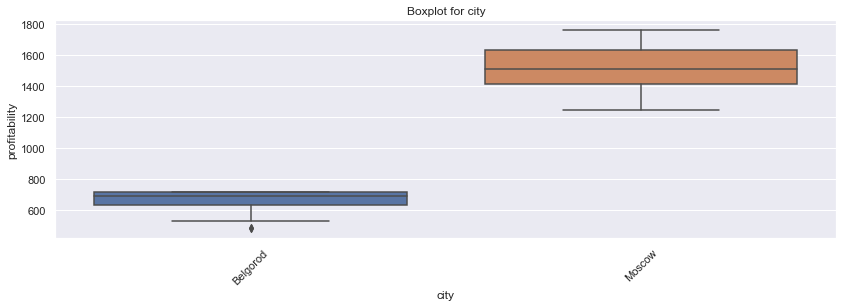

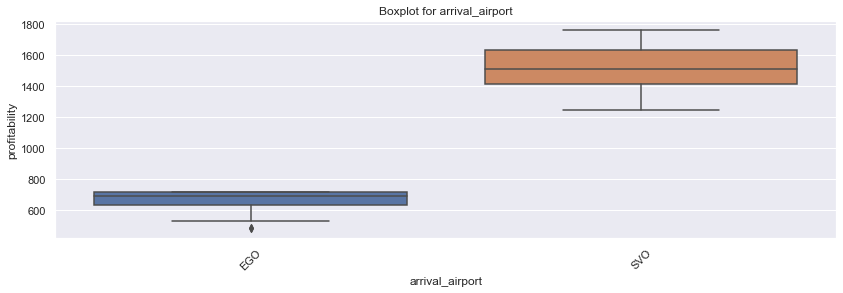

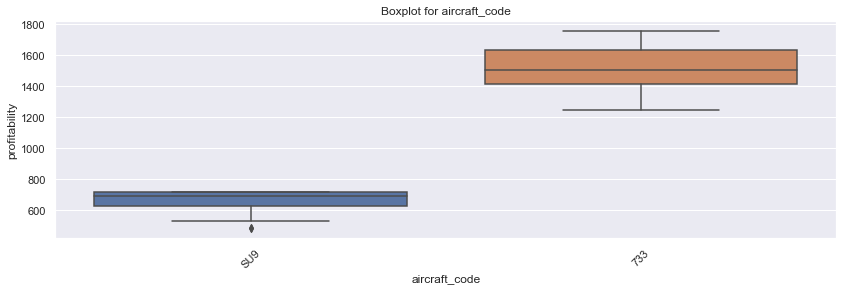

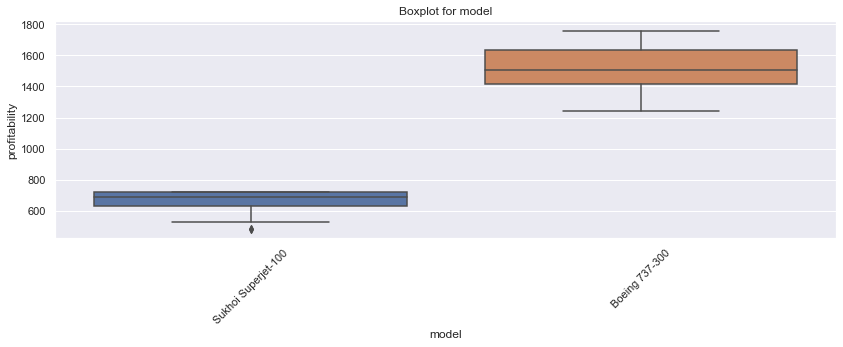

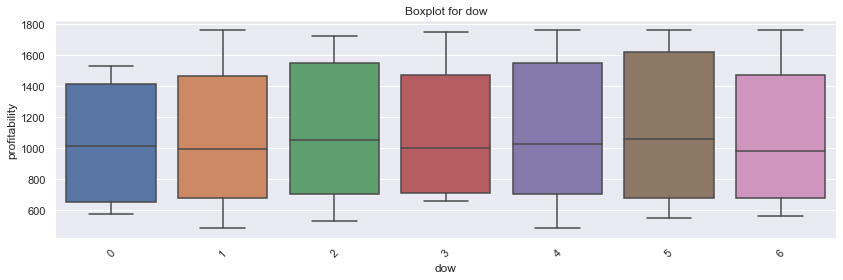

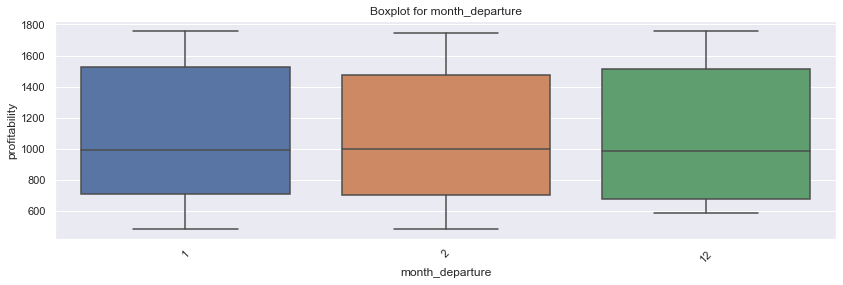

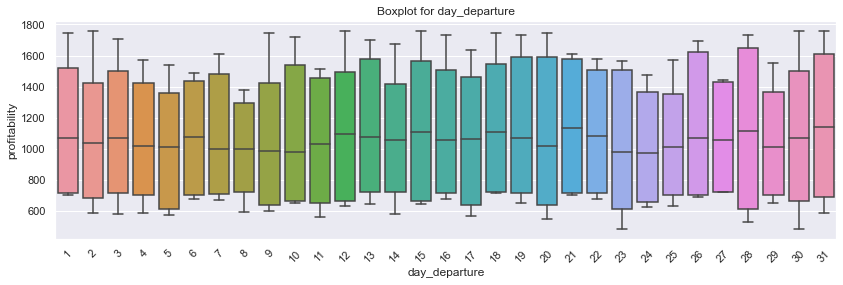

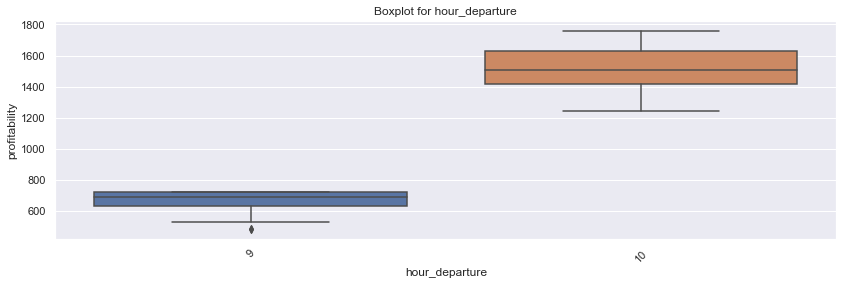

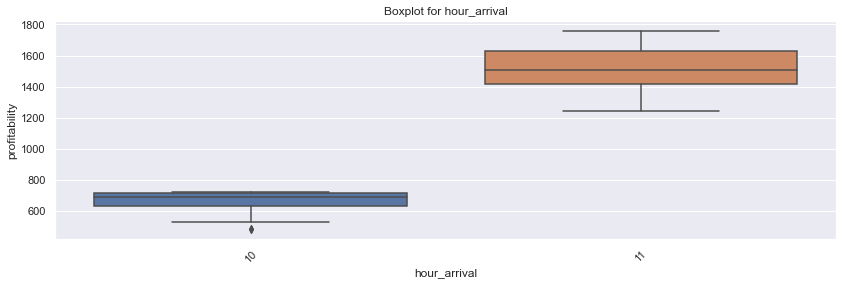

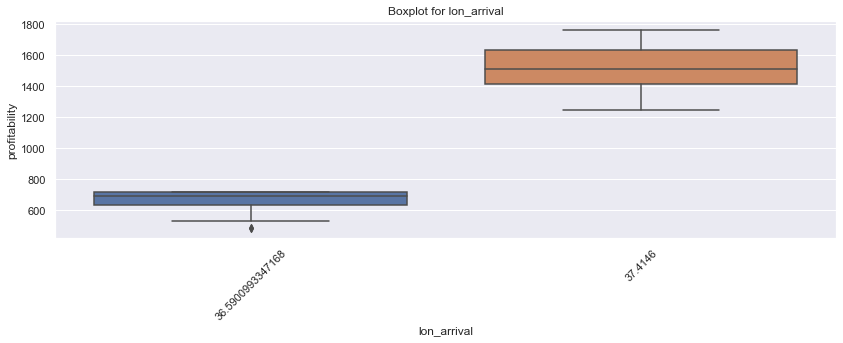

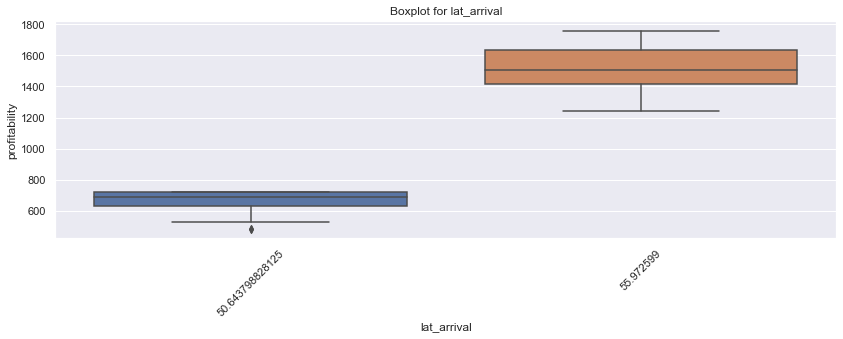

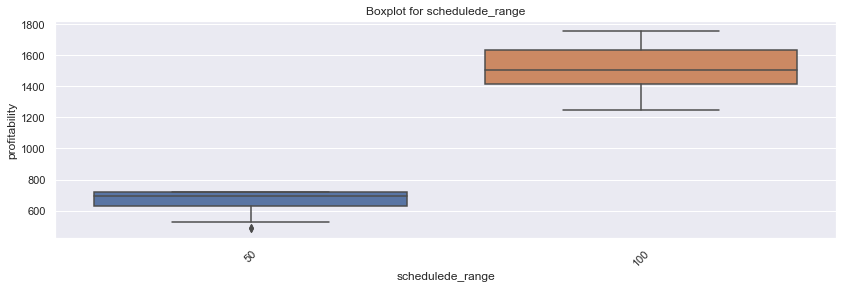

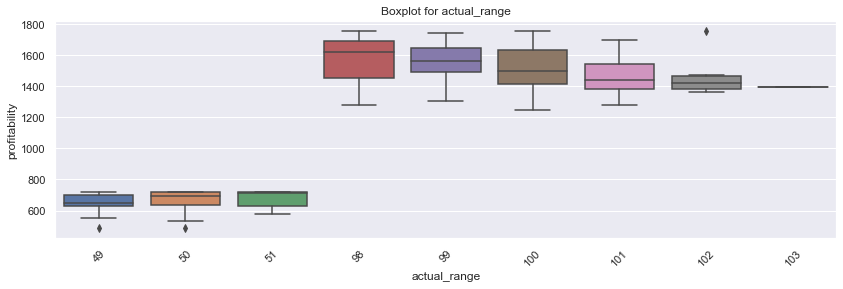

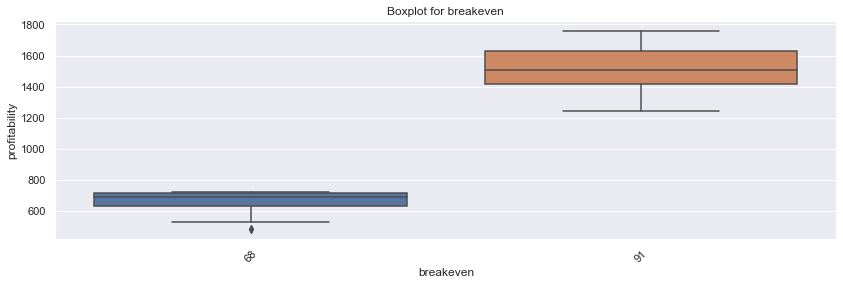

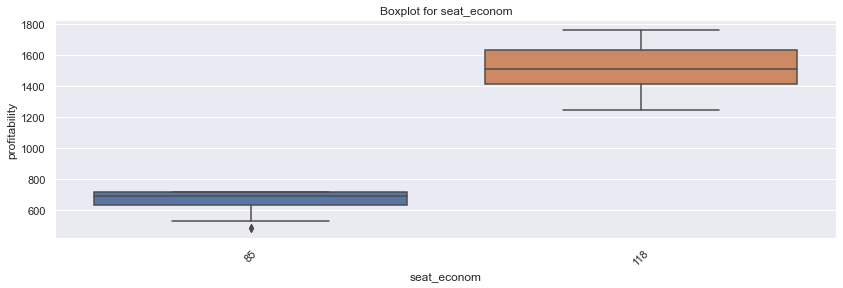

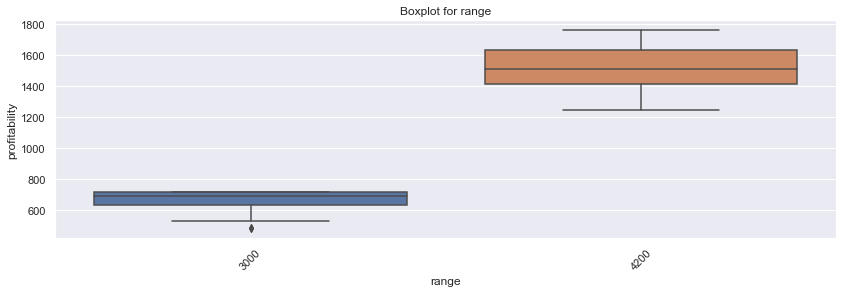

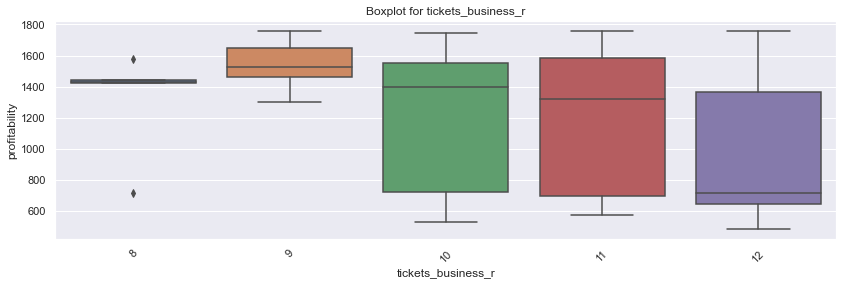

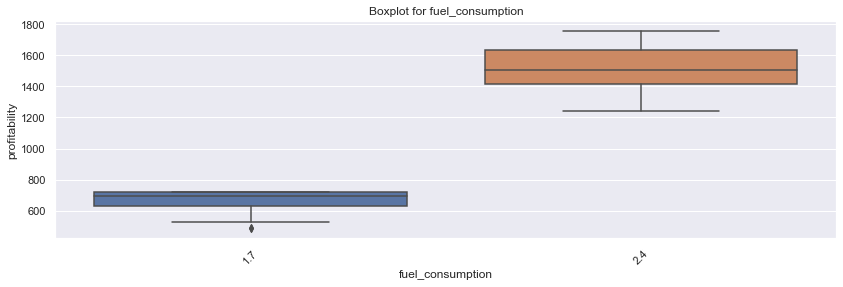

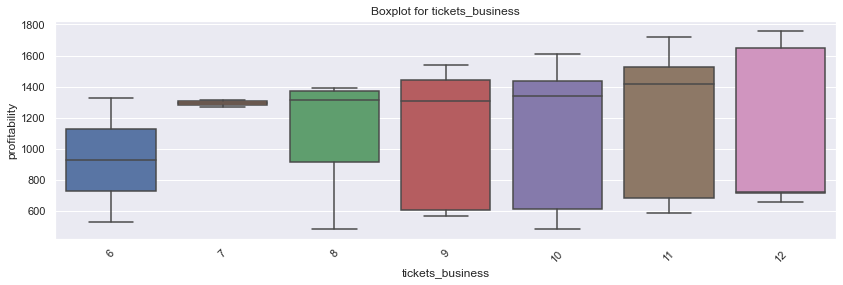

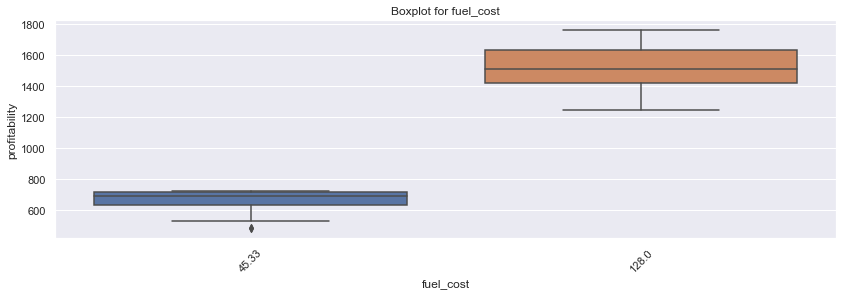

In [62]:
#Категориальные признаки: связь с прибыльностью
for col in categorical:
    get_boxplot(df, col, 'profitability')

1. Прибыльность на самолетах в Москву выше, чем в Белгород (это понятно самолеты вместительнее).
2. По дням недели распределение примерно одинаковое, хотя в пятницу среднее чуть выше, но и разброс значений больше.
3. Явных закономерностей по числам тоже нет, выборка невелика
4. Интересная закономерность между прибыльностью и реальной длительностью полета на Московских рейсах:
    Прибыльность падает с увеличением длительности полета от 98 до 103 мин с достижением максимальных значений по среднему в точке 98.

При визуализации номинальных признаков в большинстве случаев выделяется 2 максимума, 
т.к. у нас 2 типа самолета 2 города по дальности полета, что объясняет такое поведение значений. Отличаются fullness_*,
которые выражают процентное заполнение салонов, что само по себе уже не требует нормализации

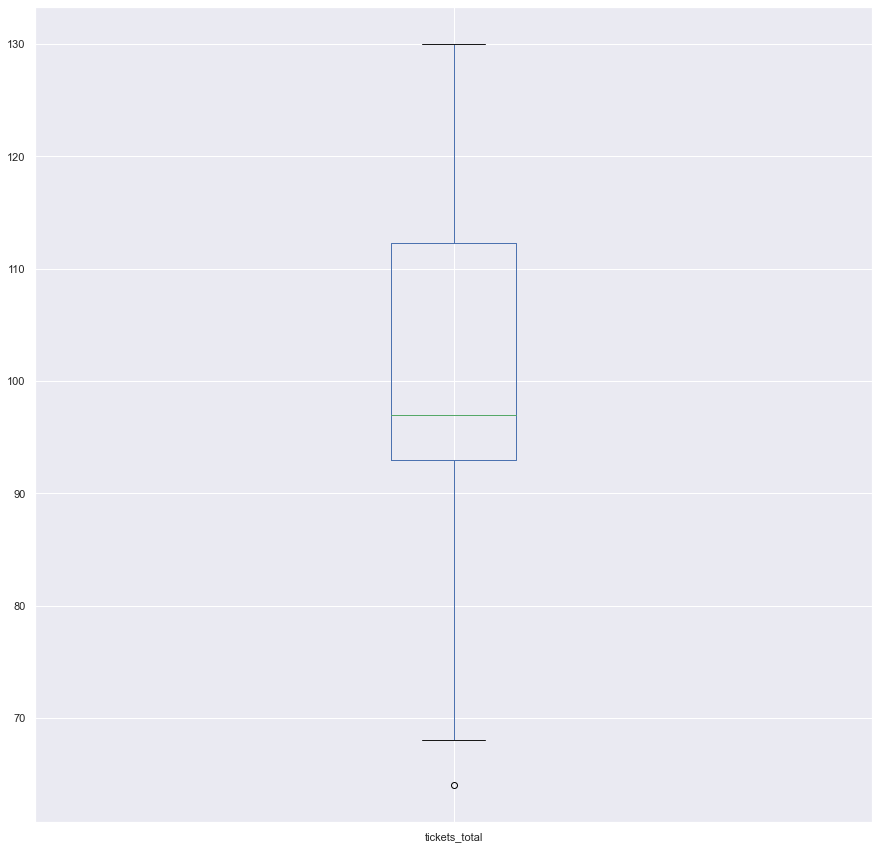

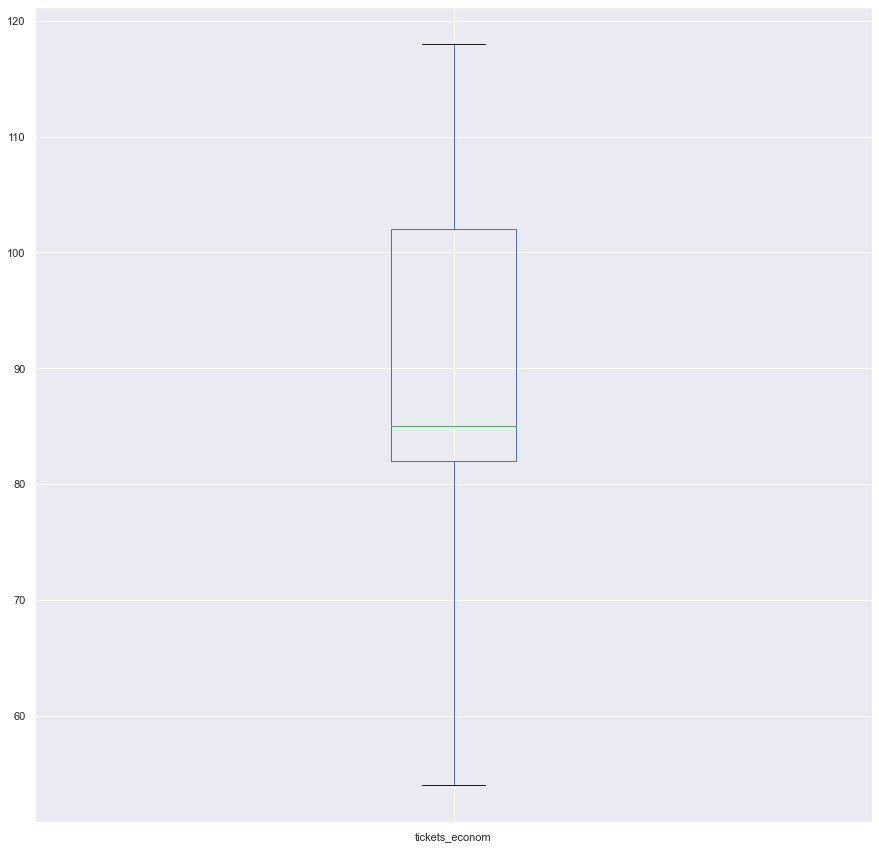

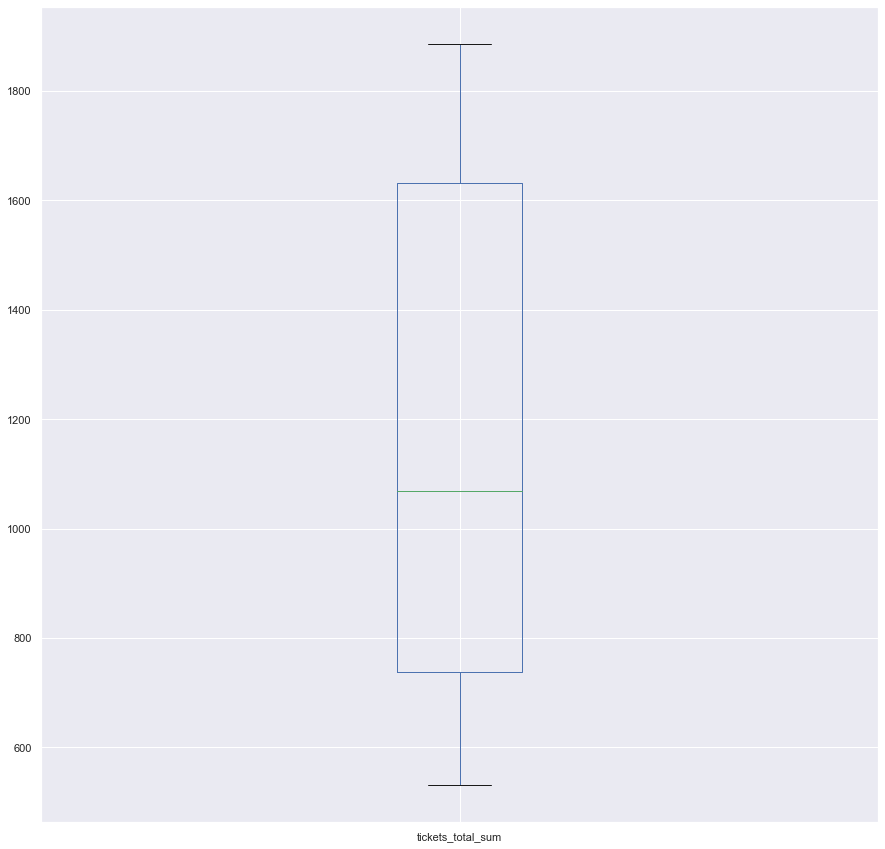

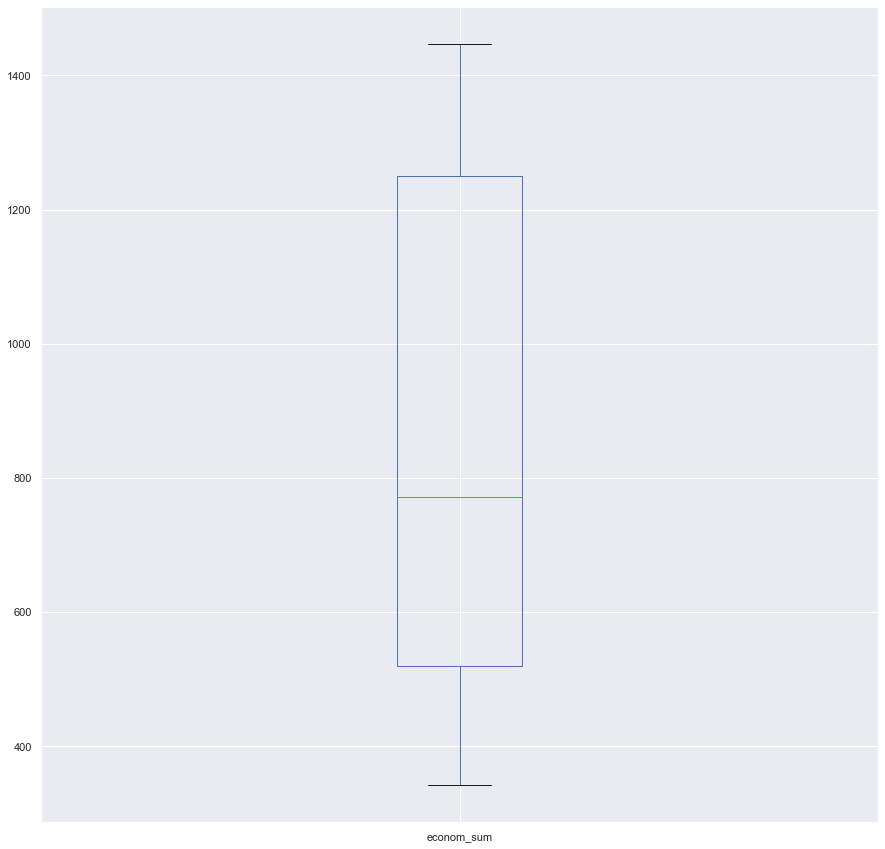

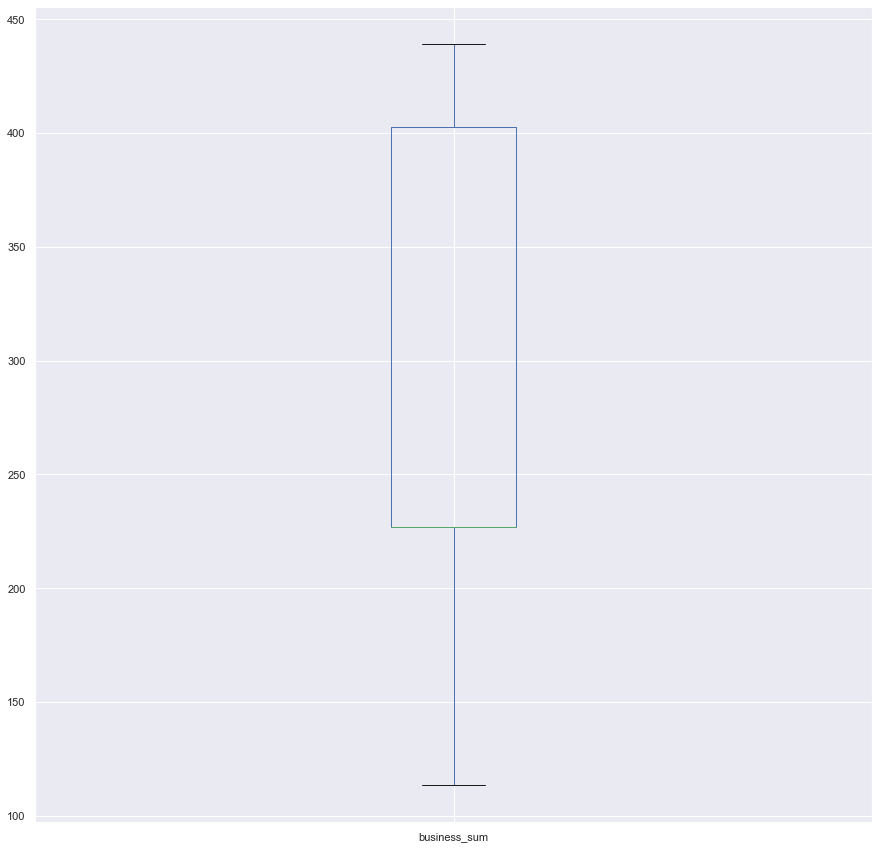

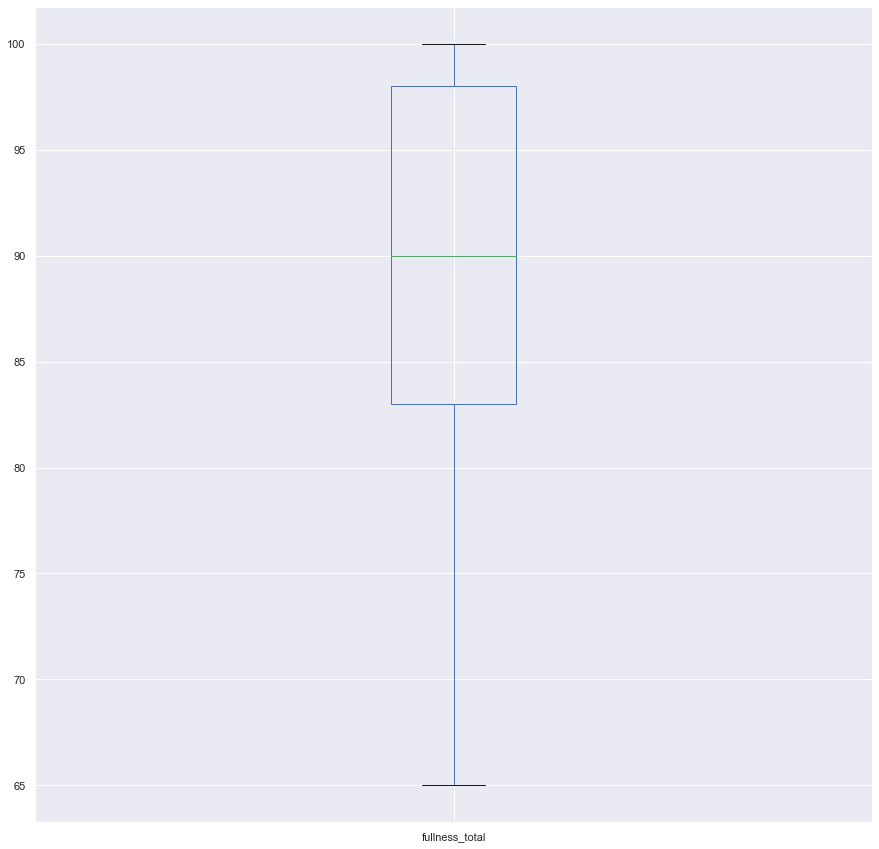

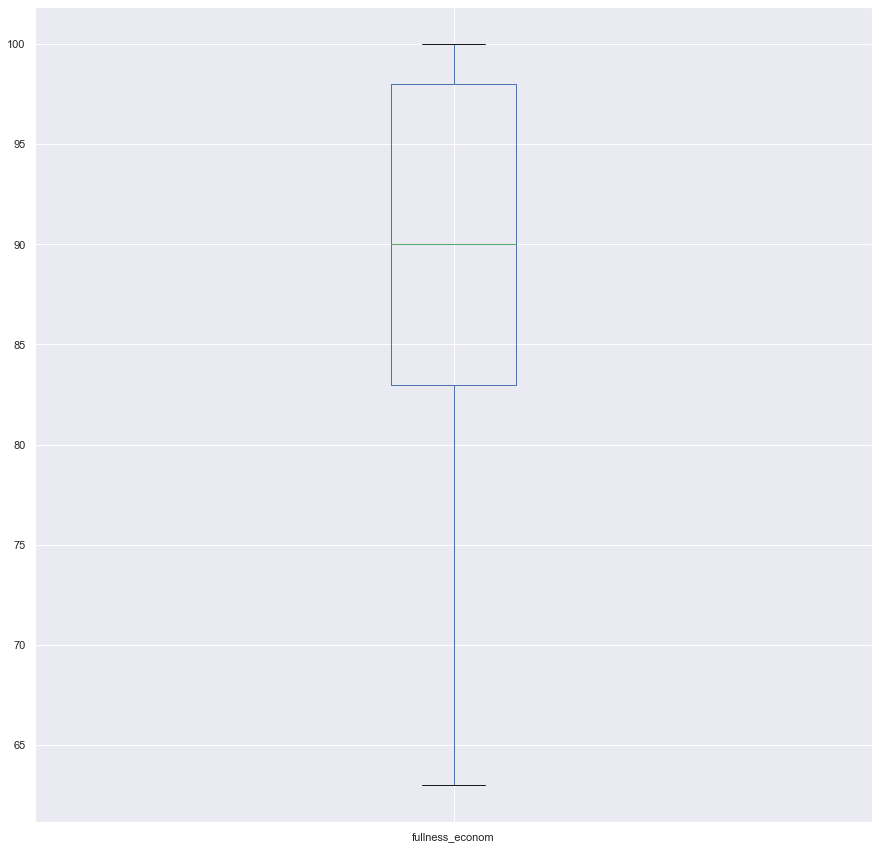

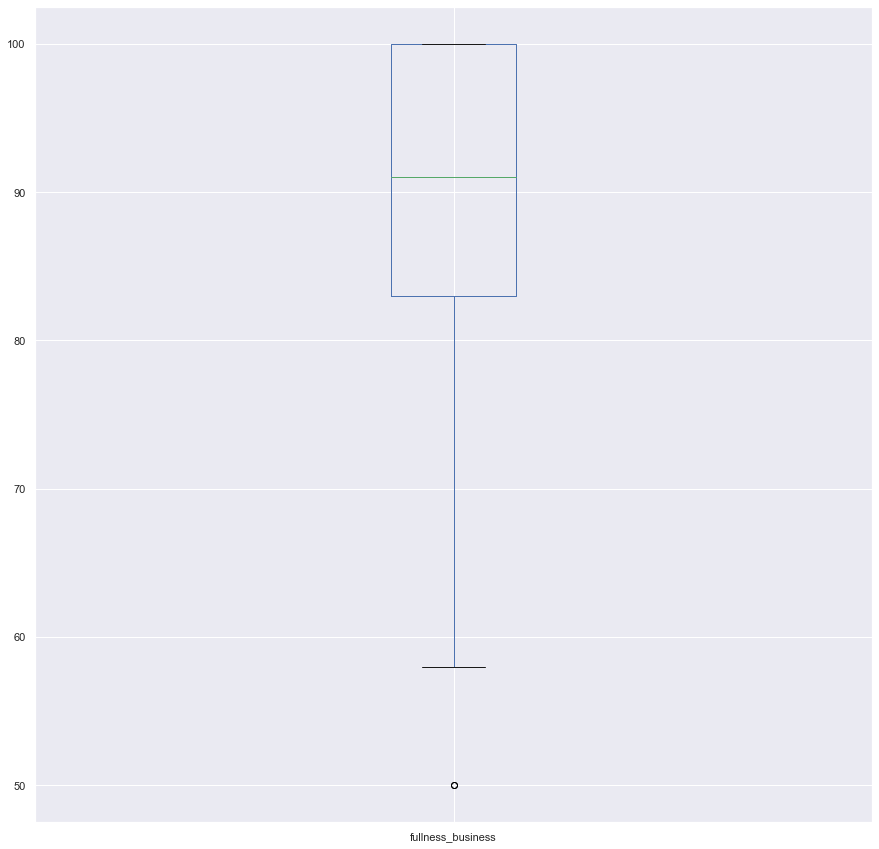

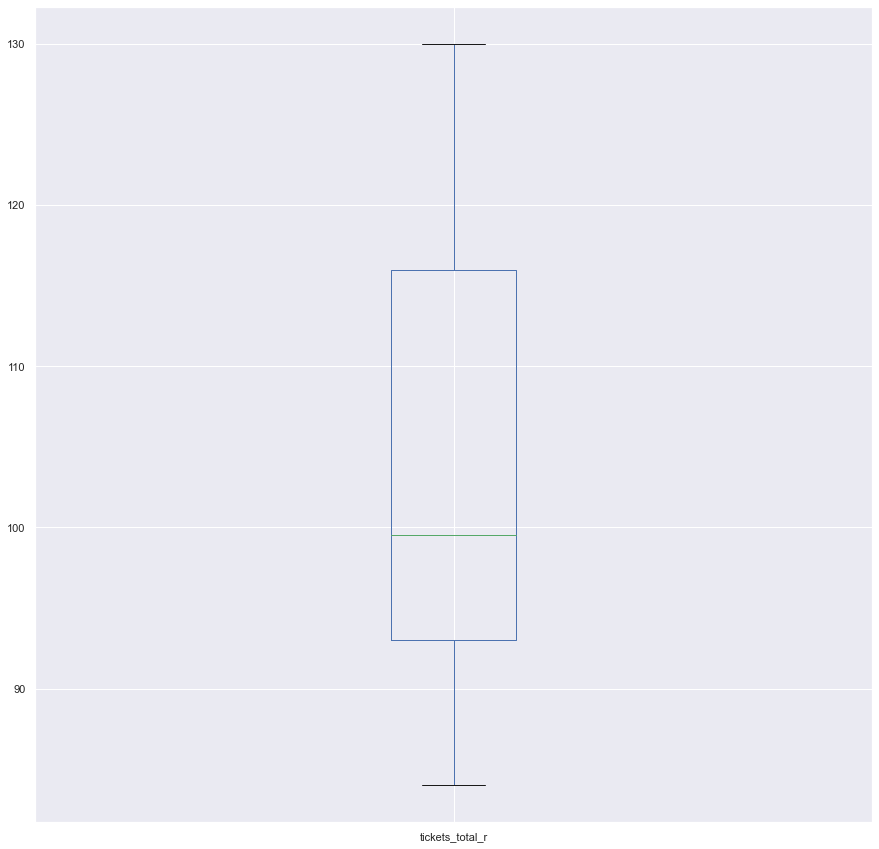

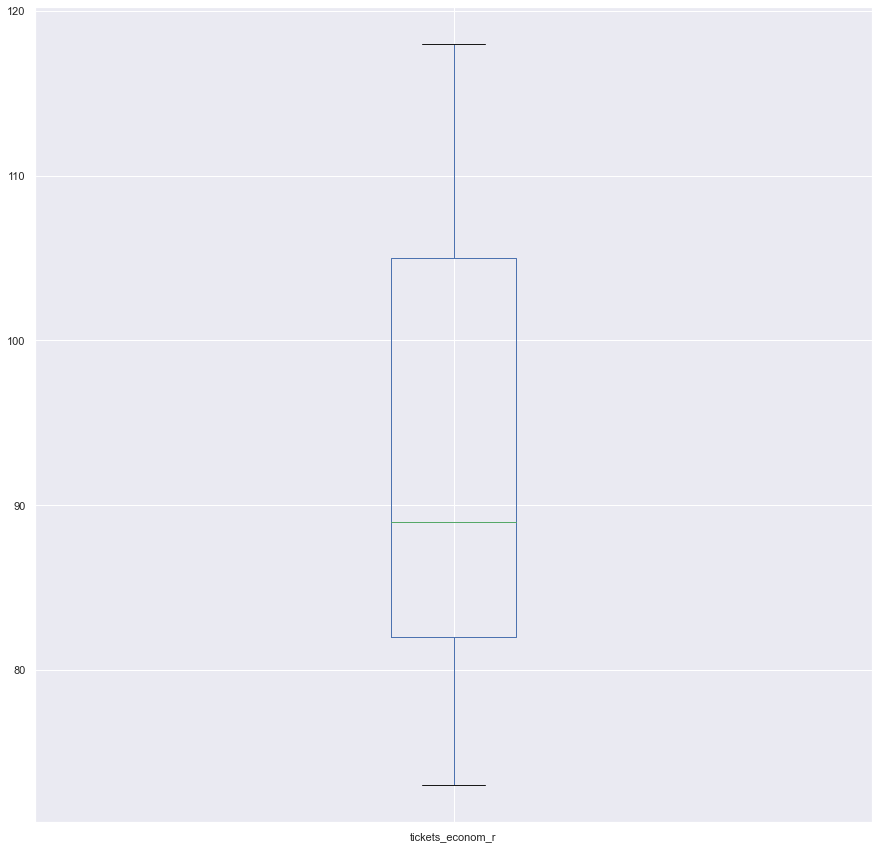

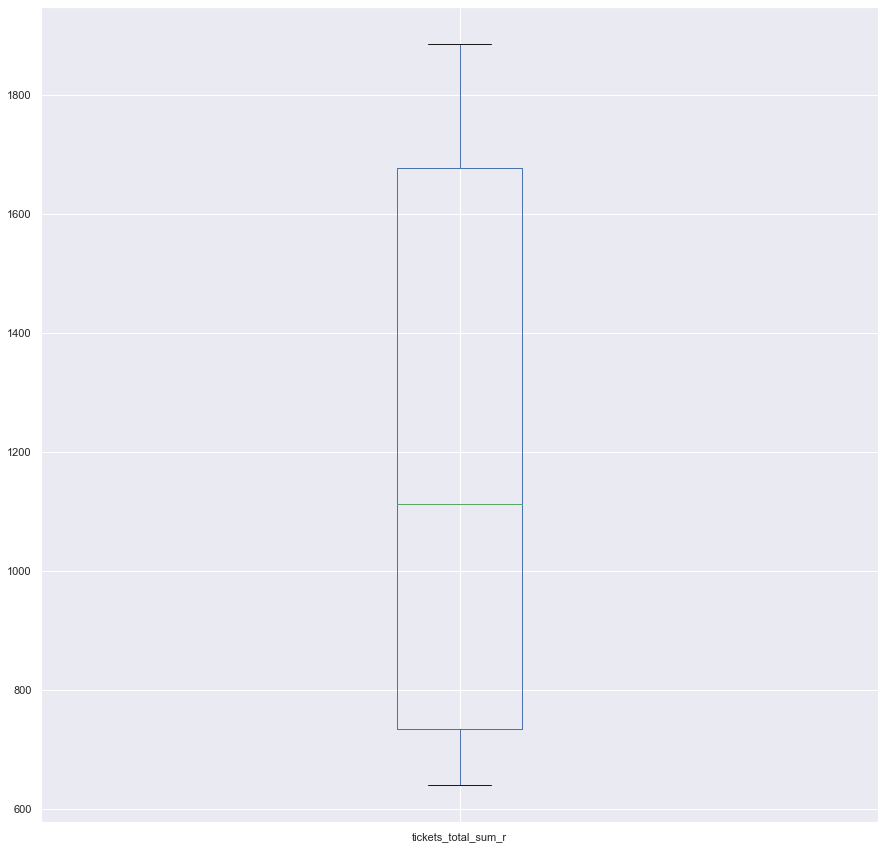

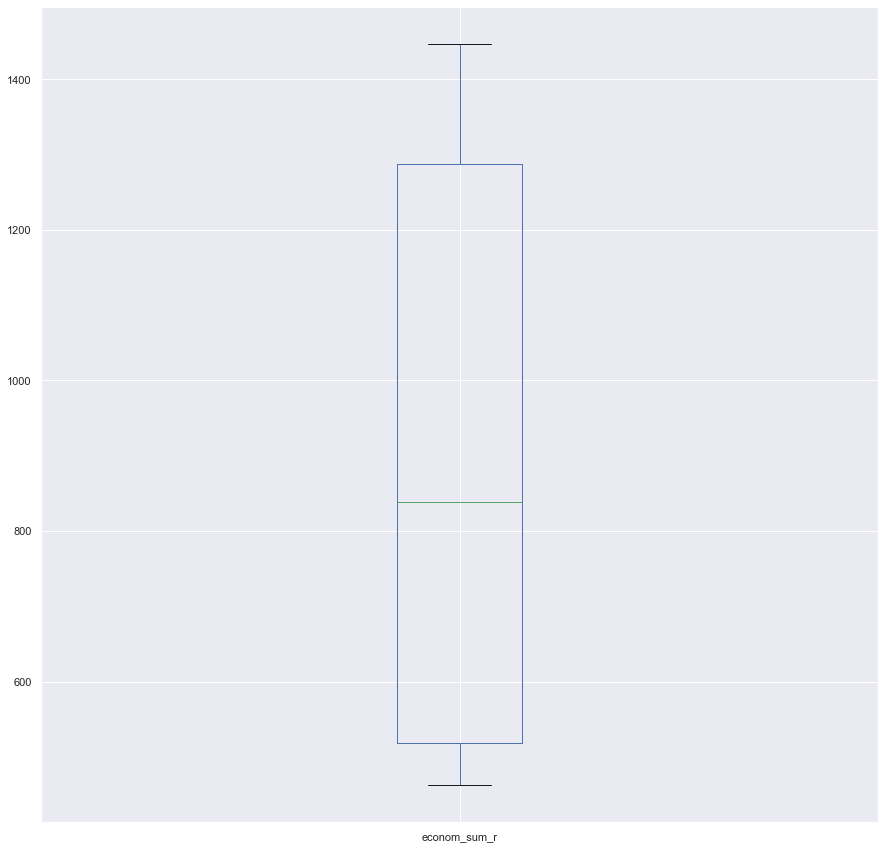

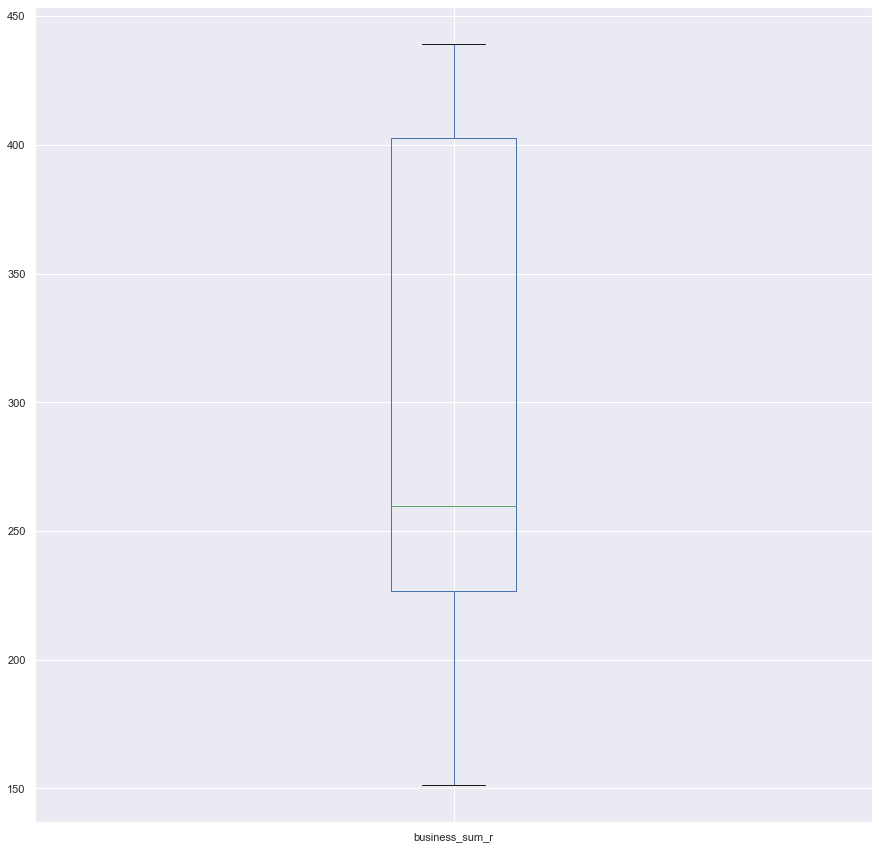

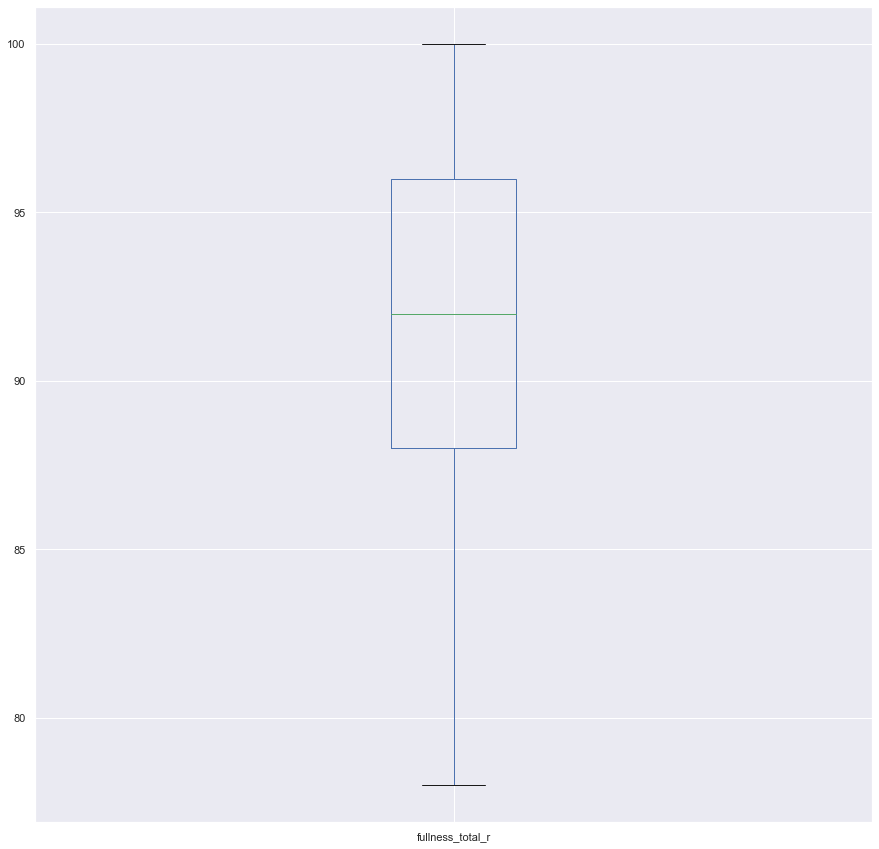

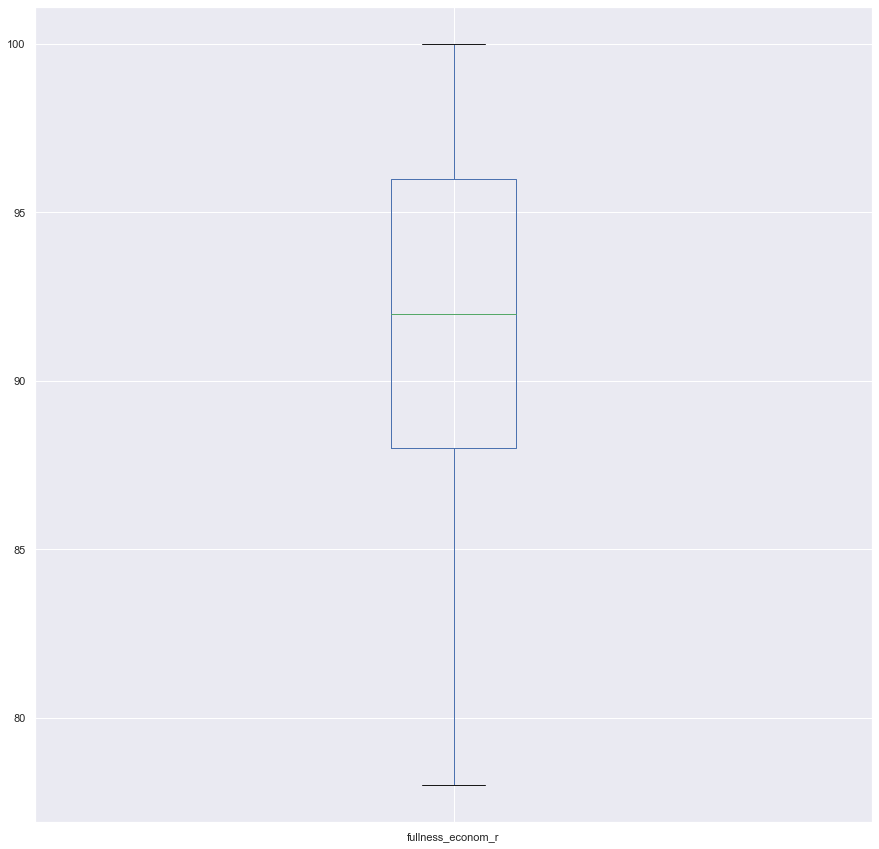

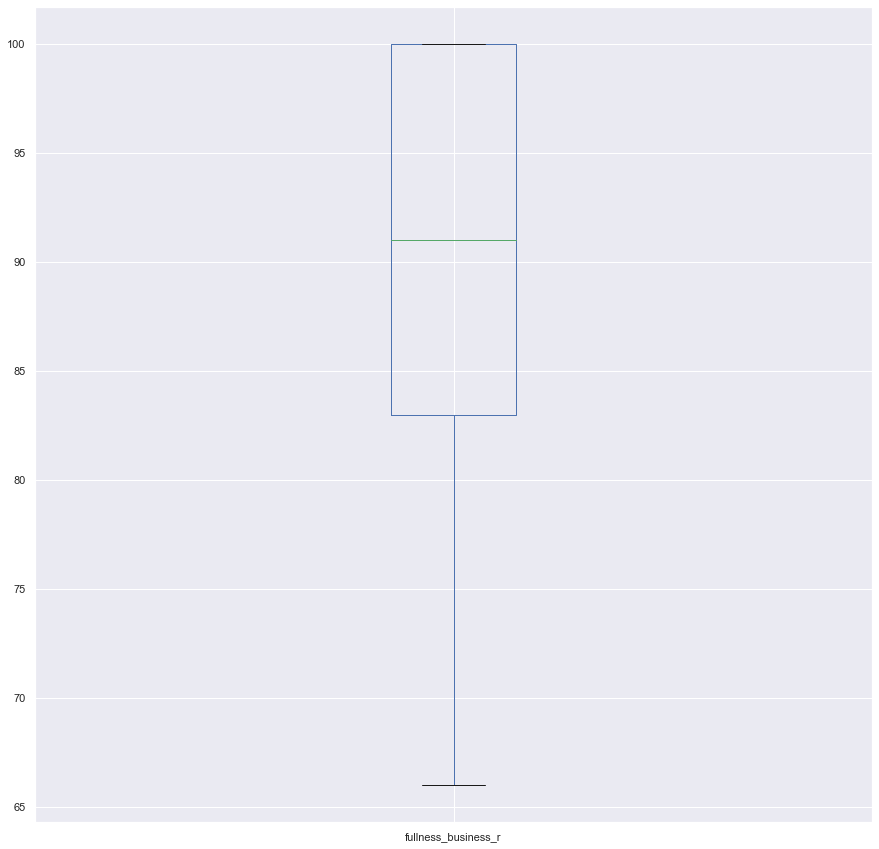

In [76]:
#визуализируем количественные данные
for col in nominal:
    df[[col]].plot(kind='box')

Имеются выбросы по нижней границе в 'tickets_total', 'tickets_bisuness', 'fullness_business', что на самом деле
показывает недозаполненность салона

Рассмотренные выше графики наталкивают на мысль изменить подход к оценке прибылности рейса. Несмотря на то, что прибыльность рейса грубо можно определять как разность между проданными билетами на рейс и затратами на топливо, в силу того, что рассматриваемый период составляет всего 3 месяца и цены на топливо в данный период можно считать постоянными, поскольку авиакомпания закупает топливо оптом. Тогда прибыльность авиарейса можно оценивать просто общим количеством
проданных билетов tickets_total. Проанализируем поведение этой величины в разрезе аэропортов назначения: Москвы и Белгорода. Этого будет достаточно потому, что рейсы туда выполняются разными моделями самолетов: "733" и "SU9", наполненность же  обратных рейсы из этих городов составляла 85-100%. Поэтому можно искать малоприбыльные только среди рейсов в прямом направлении.


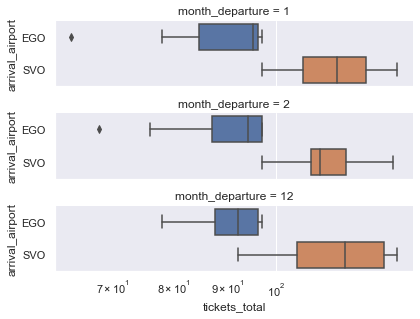

In [42]:
sns.set()
#sns.distplot(df[['tickets_total']]);
#sns.lineplot(data=df[['tickets_total']], palette="tab10", linewidth=2.5)
df['tickets_total'].describe()
#sns.catplot(x="dow", y="tickets_total", hue="arrival_airport", kind="bar", data=df)
#sns.catplot(x="month_departure", y="tickets_total", hue="arrival_airport", kind="bar", data=df)
#sns.catplot(x="day_departure", y="tickets_total", hue="arrival_airport", kind="bar", data=df)
g = sns.catplot( x="tickets_total", y="arrival_airport", row="month_departure",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

В январе и феврале выбросы по нижней границе у Белгорода (аэропорт EGO)

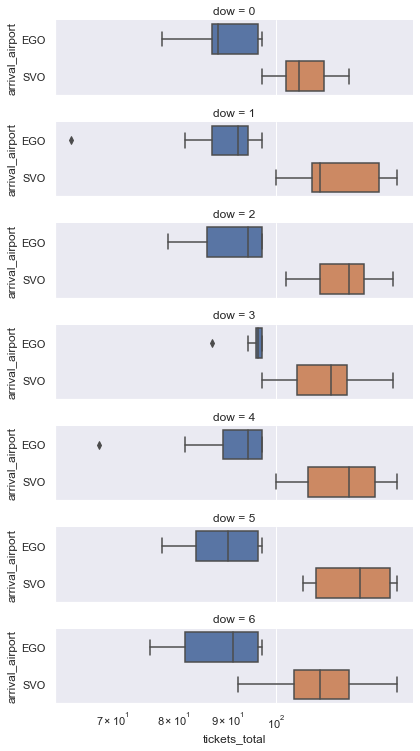

In [43]:
g = sns.catplot( x="tickets_total", y="arrival_airport", row="dow",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

Опять видим выбросы только у Белгорода в понедельник, среду и четверг

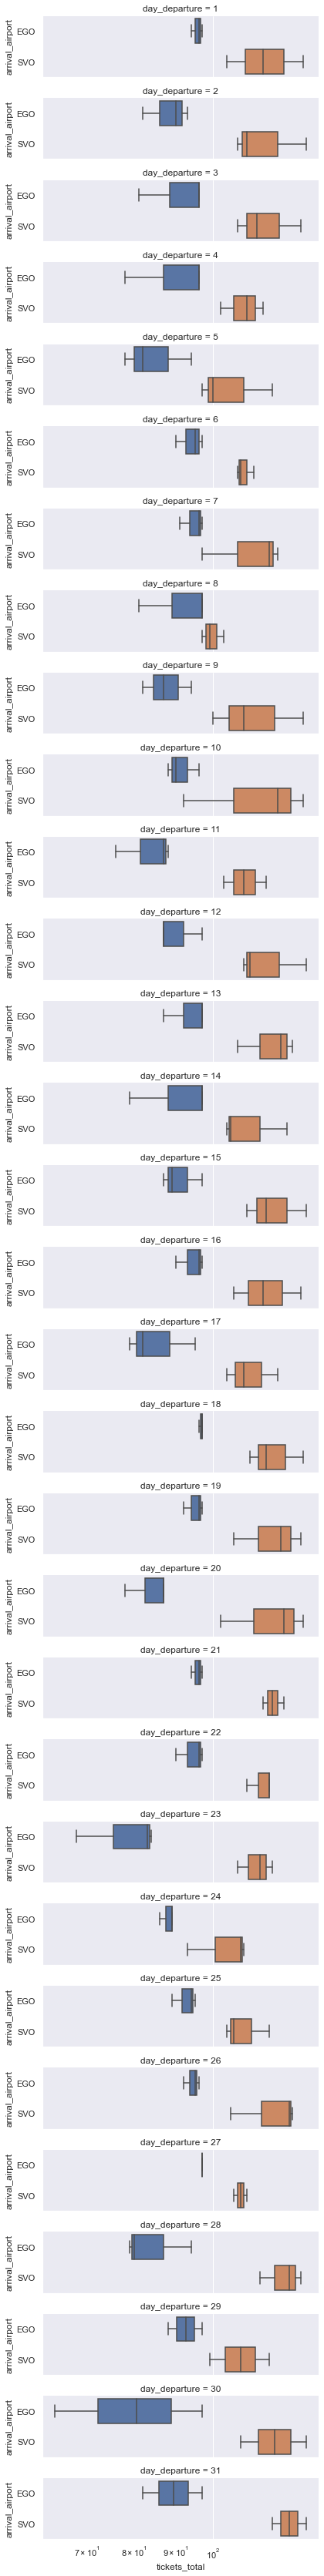

In [44]:
g = sns.catplot( x="tickets_total", y="arrival_airport", row="day_departure",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

По числам месяца картина интереснее:
    Белгород показывает низкую нижнюю границу и низкое среднее значение количества билетов по 5, 17, 23, 28, 30
    Москва - 5 и 8 числа

Все выше сказанное хорошо демонстрируется на графиках зависимости проданных билетов по датам в разрезе аэропортов назначения:

No handles with labels found to put in legend.


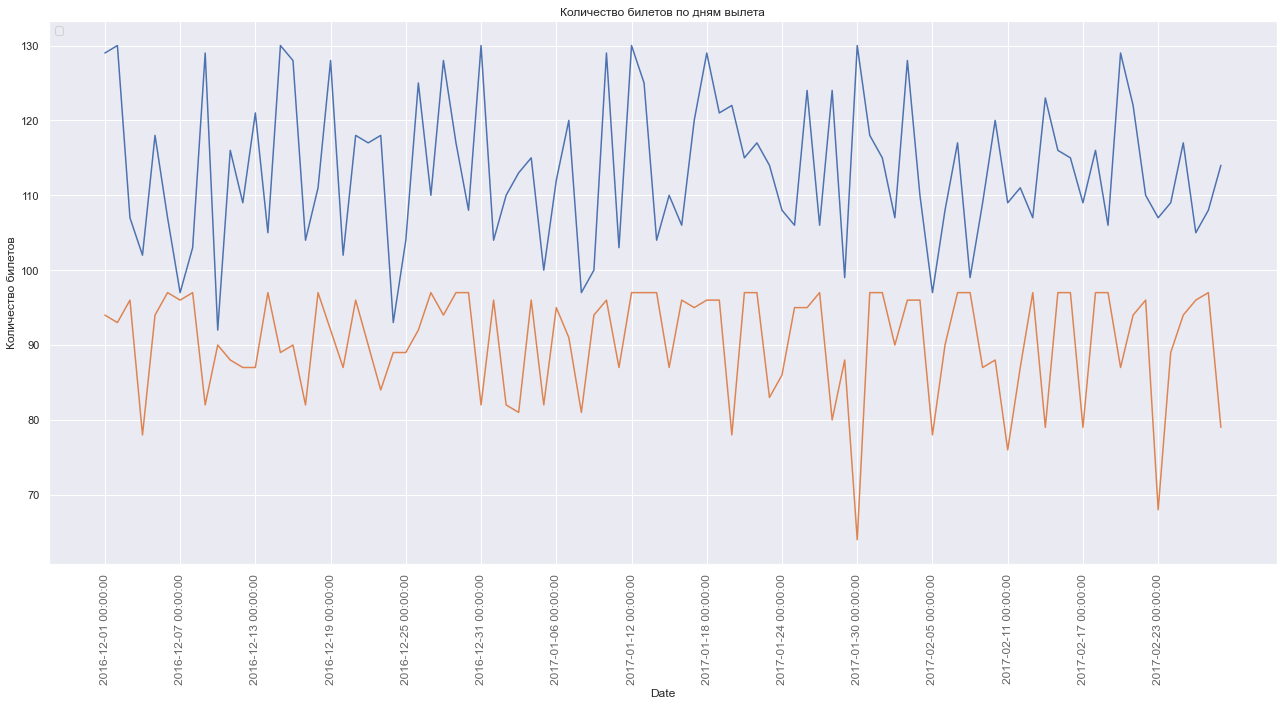

In [64]:
# 
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'], format ='%Y-%m-%d')
plt.figure(figsize=(22,10))
plt.plot(df[df['arrival_airport']=='SVO'].scheduled_departure,df[df['arrival_airport']=='SVO'].tickets_total)
plt.plot(df[df['arrival_airport']=='EGO'].scheduled_departure,df[df['arrival_airport']=='EGO'].tickets_total)
plt.title("Количество билетов по дням вылета")
plt.xlabel("Date")
plt.ylabel("Количество билетов")
xtick_location = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
xtick_labels = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.legend(loc='upper left')
plt.show()

Посмотрим на заполненность самолетов в %.

No handles with labels found to put in legend.


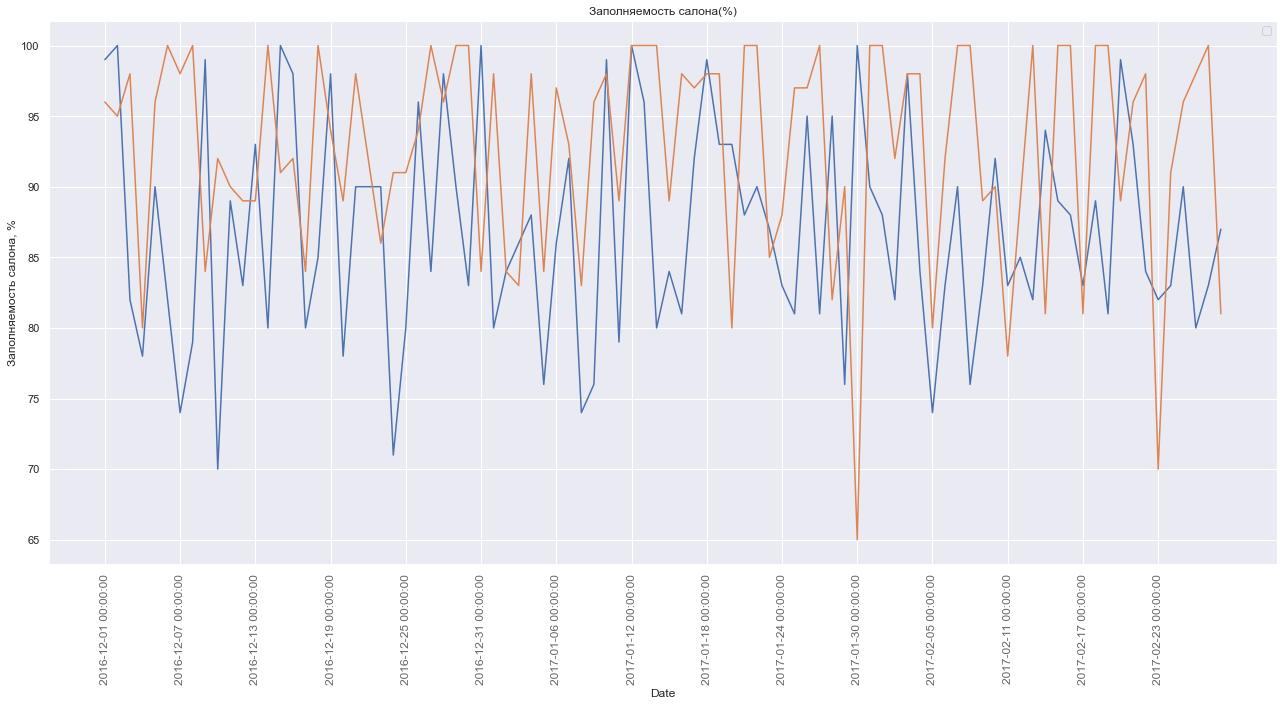

In [65]:
plt.figure(figsize=(22,10))
plt.plot(df[df['arrival_airport']=='SVO'].scheduled_departure,df[df['arrival_airport']=='SVO'].fullness_total)
plt.plot(df[df['arrival_airport']=='EGO'].scheduled_departure,df[df['arrival_airport']=='EGO'].fullness_total)
plt.title("Заполняемость салона(%)")
plt.xlabel("Date")
plt.ylabel("Заполняемость салона, %")
xtick_location = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
xtick_labels = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.legend()
plt.show()

No handles with labels found to put in legend.


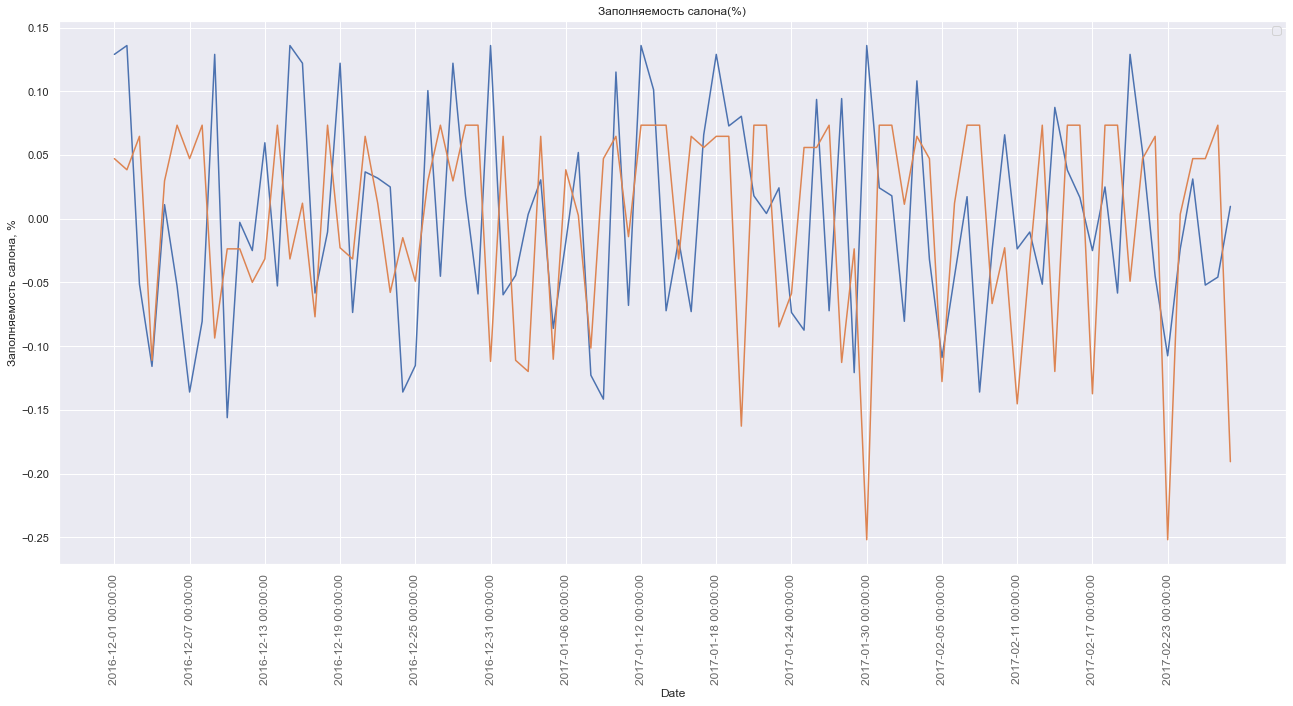

In [66]:
plt.figure(figsize=(22,10))
plt.plot(df[df['arrival_airport']=='SVO'].scheduled_departure,df[df['arrival_airport']=='SVO'].profitability_norm)
plt.plot(df[df['arrival_airport']=='EGO'].scheduled_departure,df[df['arrival_airport']=='EGO'].profitability_norm)
plt.title("Заполняемость салона(%)")
plt.xlabel("Date")
plt.ylabel("Заполняемость салона, %")
xtick_location = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
xtick_labels = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.legend()
plt.show()

No handles with labels found to put in legend.


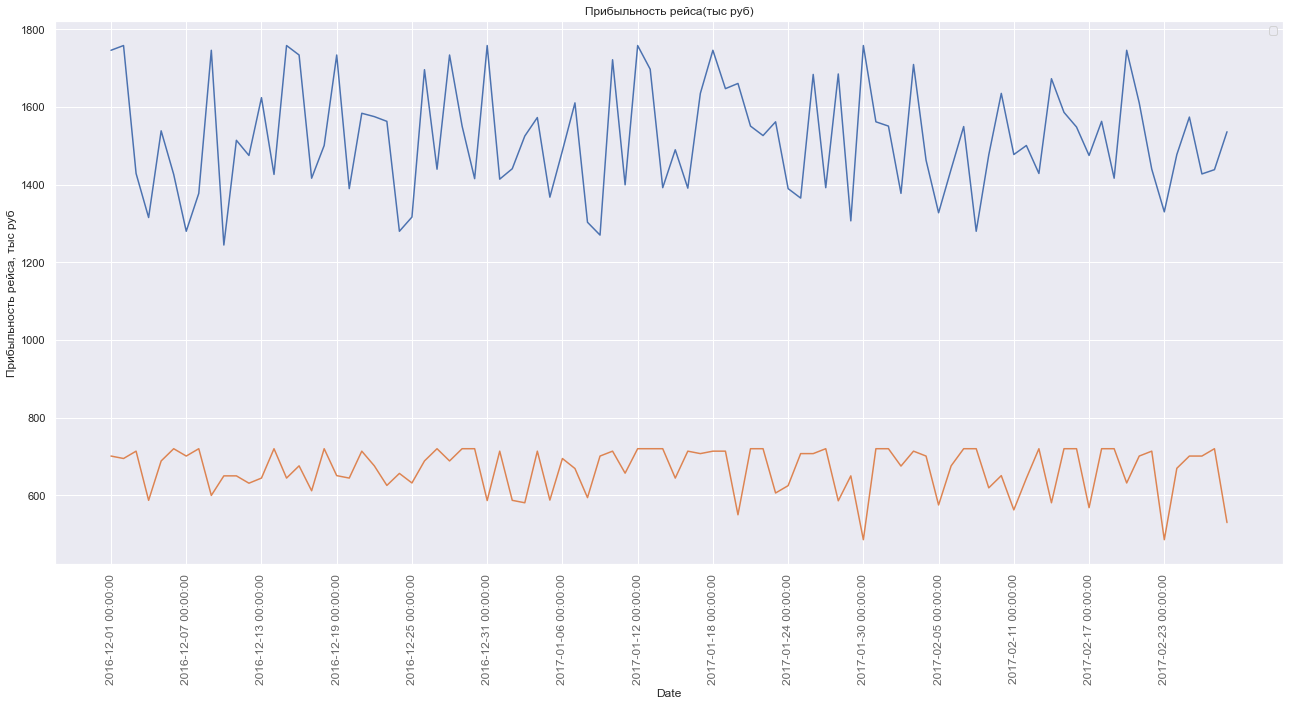

In [67]:
plt.figure(figsize=(22,10))
plt.plot(df[df['arrival_airport']=='SVO'].scheduled_departure,df[df['arrival_airport']=='SVO'].profitability)
plt.plot(df[df['arrival_airport']=='EGO'].scheduled_departure,df[df['arrival_airport']=='EGO'].profitability)
plt.title("Прибыльность рейса(тыс руб)")
plt.xlabel("Date")
plt.ylabel("Прибыльность рейса, тыс руб")
xtick_location = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
xtick_labels = df[df['arrival_airport']=='SVO'].scheduled_departure.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.legend()
plt.show()

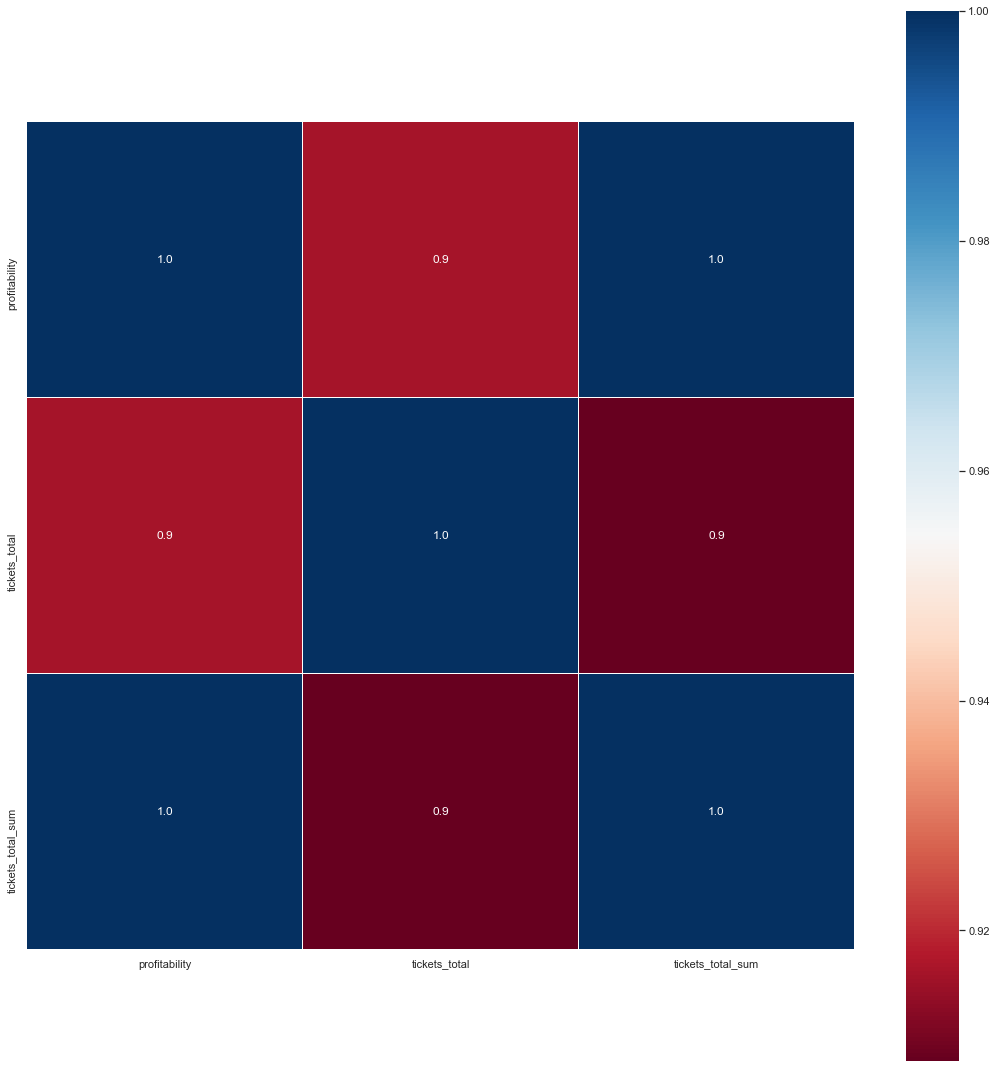

In [49]:
#Покажем хорошую сколлерированность показателей
show_correlation(df, ['profitability','tickets_total','tickets_total_sum'])

In [50]:
# Чисто убыточный рейс
df[df['tickets_total']<df['breakeven']][['flight_id','arrival_airport','scheduled_departure','dow','fullness_total','tickets_total','profitability']]

,flight_id,arrival_airport,scheduled_departure,dow,fullness_total,tickets_total,profitability
120,136642,EGO,2017-01-30,1,65.0,64,485.67


In [51]:
# Чисто убыточный рейс + 72%
df[df['tickets_total']<=df['breakeven']+2][['flight_id','arrival_airport','scheduled_departure','dow','fullness_total','tickets_total']]

,flight_id,arrival_airport,scheduled_departure,dow,fullness_total,tickets_total
19,136352,SVO,2016-12-10,6,70.0,92
47,136253,SVO,2016-12-24,6,71.0,93
120,136642,EGO,2017-01-30,1,65.0,64
169,136807,EGO,2017-02-23,4,70.0,68


 Можно посмотреть на прибыльность со стороны статистики. Для это посмотрим распределение по процентилям 
для каждого аэропорта прибытия, а также на боксплоты на предмет выбросов

In [52]:
#Белгород
df[df['arrival_airport']=='EGO']['profitability'].describe()

count     90.000000
mean     667.066667
std       58.773719
min      485.670000
25%      631.770000
50%      691.620000
75%      718.395000
max      719.970000
Name: profitability, dtype: float64

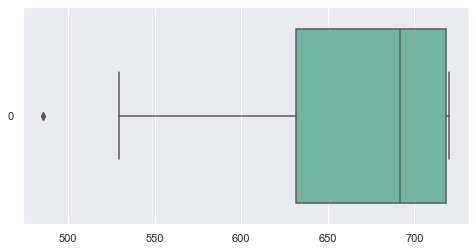

In [53]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[df['arrival_airport']=='EGO']['profitability'], orient="h",\
                 palette="Set2", whis=1.5);

In [54]:
#Для Белгорода хорошо видно выбросы: значения в 485 тыс руб и и нижняя граница в 530 тыс.
#Вот эти рейсы:  
df[df['profitability']<530][['flight_id','arrival_airport','scheduled_departure',\
                             'dow','fullness_total','tickets_total','tickets_total_sum',\
                             'profitability']].sort_values(by='profitability' )

,flight_id,arrival_airport,scheduled_departure,dow,fullness_total,tickets_total,tickets_total_sum,profitability
120,136642,EGO,2017-01-30,1,65.0,64,531.0,485.67
169,136807,EGO,2017-02-23,4,70.0,68,531.0,485.67
179,136844,EGO,2017-02-28,2,81.0,79,575.1,529.77


In [55]:
#Для Москвы:
df[df['arrival_airport']=='SVO']['profitability'].describe()

count      90.000000
mean     1518.897778
std       143.771274
min      1244.400000
25%      1415.500000
50%      1507.300000
75%      1632.050000
max      1758.000000
Name: profitability, dtype: float64

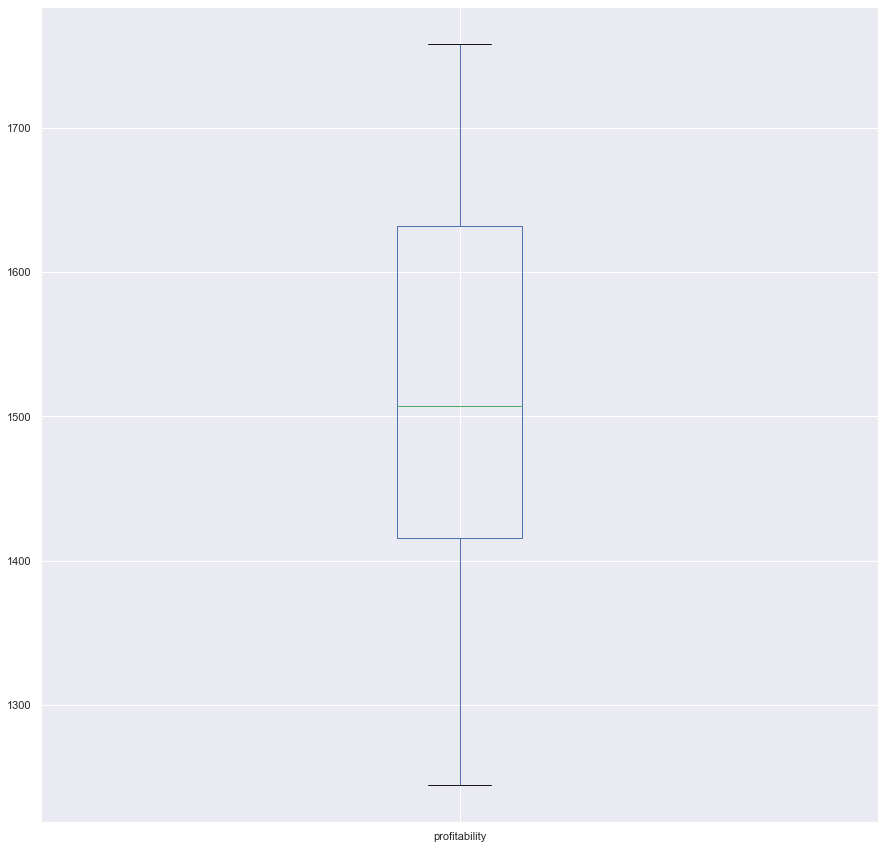

In [56]:
df[df['arrival_airport']=='SVO']['profitability'].plot(kind='box');

In [57]:
#Для Москвы плохими значениями будет прибыльность менее 1250 тыс руб 
# И Вот этот рейс:  
df[(df['profitability']<1250) & (df['arrival_airport']=='SVO')][['flight_id','arrival_airport','scheduled_departure',\
                             'dow','fullness_total','tickets_total','tickets_total_sum',\
                             'profitability']].sort_values(by='profitability' )

,flight_id,arrival_airport,scheduled_departure,dow,fullness_total,tickets_total,tickets_total_sum,profitability
19,136352,SVO,2016-12-10,6,70.0,92,1372.4,1244.4


# Вывод:

В данной постановке задачи убыточными можно считать рейсы с flight_id:
    
    136352
    136642
    136807
    136844    
    